In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [24]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
#Import the dataset
data=pd.read_csv(r'C:\Users\sayan\Downloads\new\AAPL.csv')

In [5]:
data.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600

In [6]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
10826  2023-11-21  191.410004  191.520004  189.740005  190.639999  190.639999   
10827  2023-11-22  191.490005  192.929993  190.830002  191.309998  191.309998   
10828  2023-11-24  190.869995  190.899994  189.250000  189.970001  189.970001   
10829  2023-11-27  189.919998  190.669998  188.899994  189.789993  189.789993   
10830  2023-11-28  189.779999  191.080002  189.399994  190.399994  190.399994   

         Volume  
10826  38134500  
10827  39617700  
10828  24048300  
10829  40552600  
10830  38368300

In [272]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [366]:
##Exploratory Data Analysis

In [7]:
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [8]:
#Data type of each field ---> Date is not datetime dtype yet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10831 entries, 0 to 10830
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10831 non-null  object 
 1   Open       10831 non-null  float64
 2   High       10831 non-null  float64
 3   Low        10831 non-null  float64
 4   Close      10831 non-null  float64
 5   Adj Close  10831 non-null  float64
 6   Volume     10831 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 592.4+ KB


In [9]:
#No: of unique values in each field
data.nunique()

Date         10831
Open          6152
High          6092
Low           6075
Close         6257
Adj Close     7816
Volume       10267
dtype: int64

In [11]:
#No: of null valuesin each field
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
data.describe().round(2)

Open      High       Low     Close  Adj Close        Volume
count  10831.00  10831.00  10831.00  10831.00   10831.00  1.083100e+04
mean      19.71     19.92     19.50     19.72      18.97  3.220299e+08
std       41.24     41.71     40.81     41.28      40.87  3.364882e+08
min        0.05      0.05      0.05      0.05       0.04  0.000000e+00
25%        0.29      0.30      0.29      0.29       0.24  1.165024e+08
50%        0.51      0.52      0.50      0.51       0.42  2.094760e+08
75%       18.75     18.95     18.62     18.77      16.34  4.018896e+08
max      196.24    198.23    195.28    196.45     195.93  7.421641e+09

In [16]:
#Changing the date field to datetime
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10831 entries, 0 to 10830
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10831 non-null  datetime64[ns]
 1   Open       10831 non-null  float64       
 2   High       10831 non-null  float64       
 3   Low        10831 non-null  float64       
 4   Close      10831 non-null  float64       
 5   Adj Close  10831 non-null  float64       
 6   Volume     10831 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 592.4 KB


In [17]:
#Converting date to index of the dataset
data.index=data.pop('Date')

In [18]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099319   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094137   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087228   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089387   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091978   
...                ...         ...         ...         ...         ...   
2023-11-21  191.410004  191.520004  189.740005  190.639999  190.639999   
2023-11-22  191.490005  192.929993  190.830002  191.309998  191.309998   
2023-11-24  190.869995  190.899994  189.250000  189.970001  189.970001   
2023-11-27  189.919998  190.669998  188.899994  189.789993  189.789993   
2023-11-28  189.779999  191.080002  189.399994  190.399994  190.399994   

               Volume  
Date                   
1980-12-12  469033600  
1980-12-15  175884800  
1980-12-16  105728000  
1980-12-17   86441600  
1980-12-18   73449600  
...               ...  
2023-11-21   38134500  
2023-11-22   39617700  
2023-11-24   24048300  
2023-11-27   40552600  
2023-11-28   38368300  

[10831 rows x 6 columns]

<Axes: >

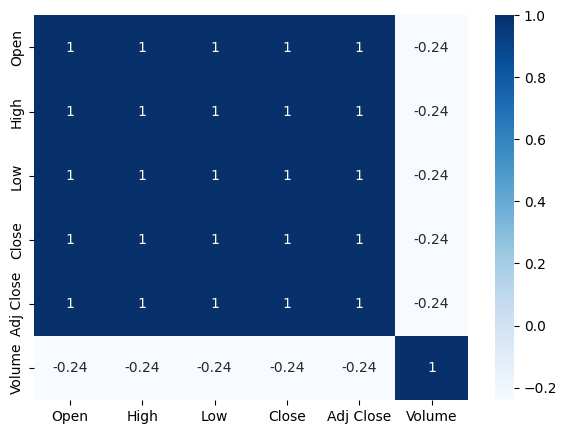

In [1232]:
#Using heatmap to understand correlation between the variables
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
#1---> positive correlation

In [1021]:
data['open-high'] = data['Open']-data['High']
data['open-low'] = data['Open'] - data['Low']
data['close-high'] = data['Close']-data['High']
data['high-low'] = data['High'] - data['Low']
data['open-close'] = data['Open'] - data['Close']
data['close-low'] = data['Close'] - data['Low']

data.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-11-21  191.410004  191.520004  189.740005  190.639999  190.639999   
2023-11-22  191.490005  192.929993  190.830002  191.309998  191.309998   
2023-11-24  190.869995  190.899994  189.250000  189.970001  189.970001   
2023-11-27  189.919998  190.669998  188.899994  189.789993  189.789993   
2023-11-28  189.779999  191.080002  189.399994  190.399994  190.399994   

              Volume  open-high  open-low  close-high  high-low  open-close  \
Date                                                                          
2023-11-21  38134500  -0.110000  1.669999   -0.880005  1.779999    0.770005   
2023-11-22  39617700  -1.439988  0.660003   -1.619995  2.099991    0.180007   
2023-11-24  24048300  -0.029999  1.619995   -0.929993  1.649994    0.899994   
2023-11-27  40552600  -0.750000  1.020004   -0.880005  1.770004    0.130005   
2023-11-28  38368300  -1.300003  0.380005   -0.680008  1.680008   -0.619995   

            close-low  
Date                   
2023-11-21   0.899994  
2023-11-22   0.479996  
2023-11-24   0.720001  
2023-11-27   0.889999  
2023-11-28   1.000000

<Axes: >

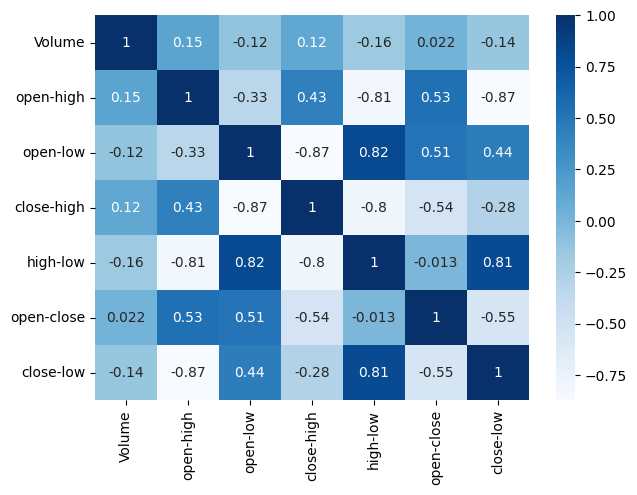

In [1022]:
data2 = data.copy()
data2 = data2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

#High negative correlation between volume and high-low => greater the difference between the highest and the lowest value of the stock, greater number of stockes will be traded that day

In [19]:
data.shape

(10831, 6)

In [20]:
data.duplicated().sum()
#No duplicates

0

Open


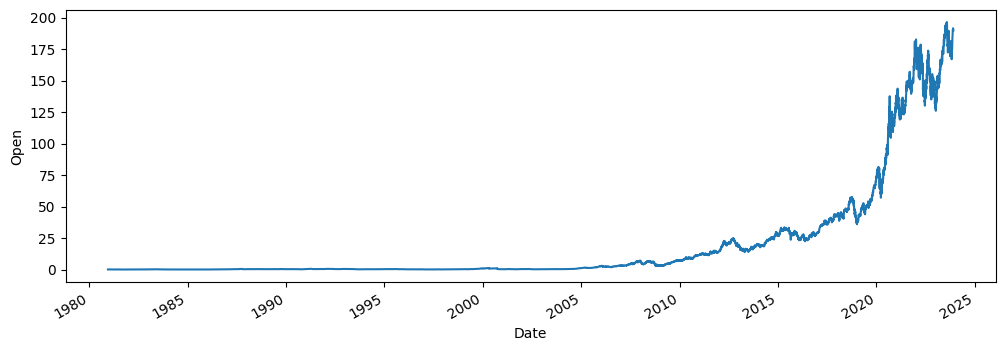

High


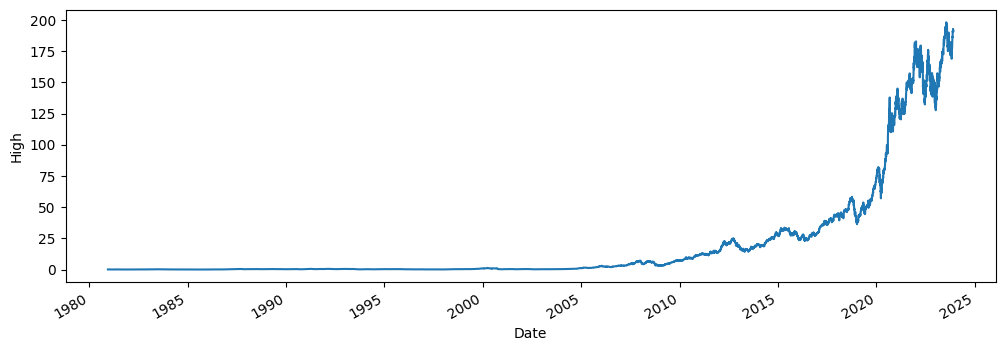

Low


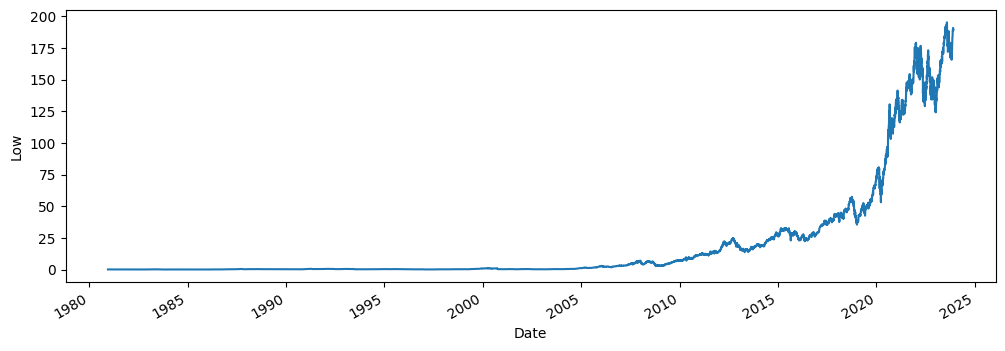

Close


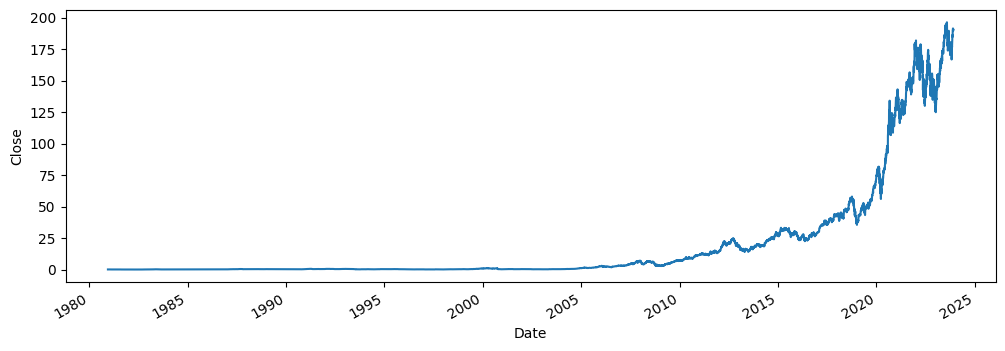

Adj Close


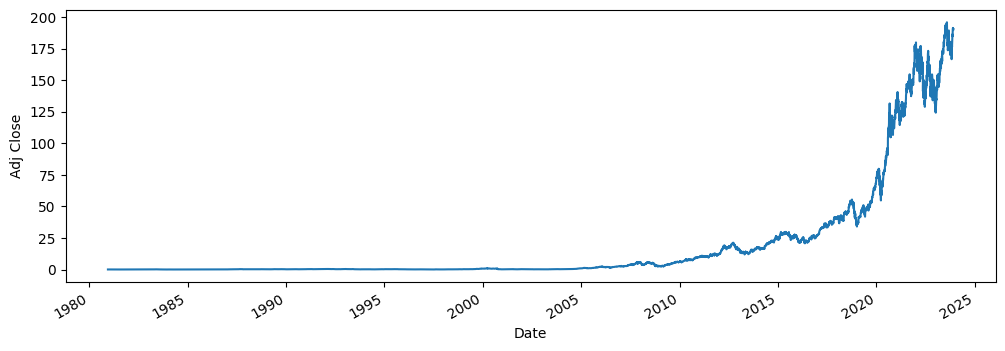

Volume


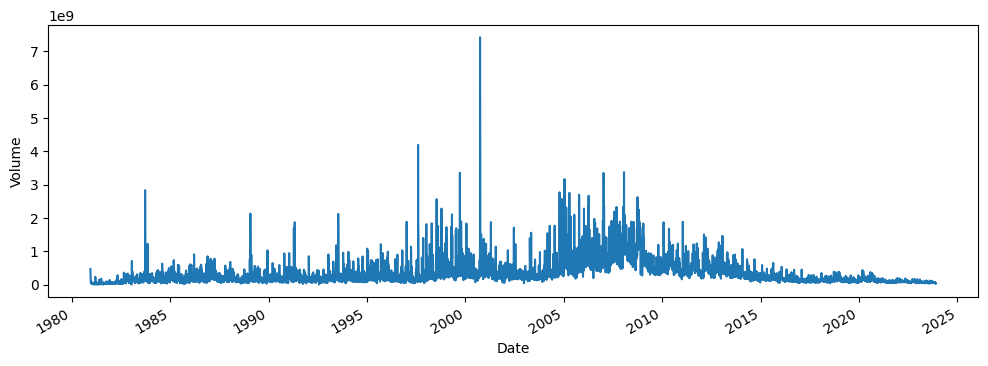

In [21]:
import matplotlib.pyplot as plt 

for col in data.columns:
    print(col)
    data[col].plot(ylabel=col,figsize=(12,4))
    plt.show()

Open
Skew : 2.65


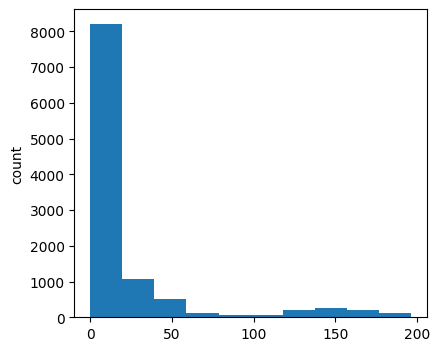

High
Skew : 2.65


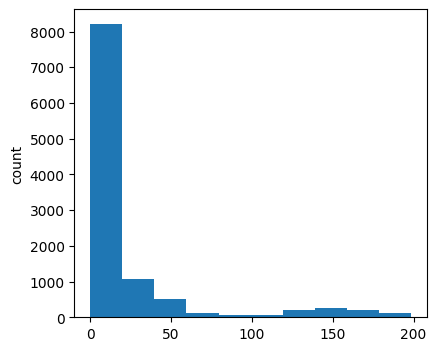

Low
Skew : 2.65


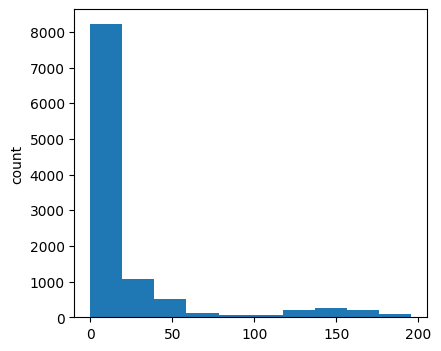

Close
Skew : 2.65


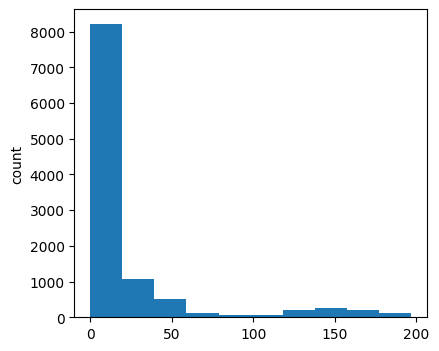

Adj Close
Skew : 2.71


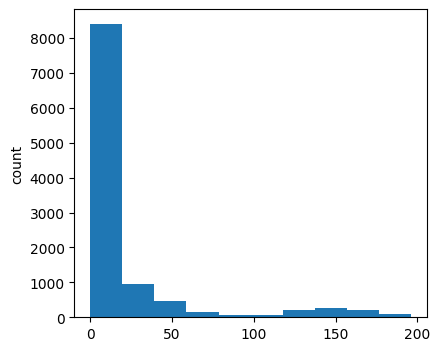

Volume
Skew : 3.56


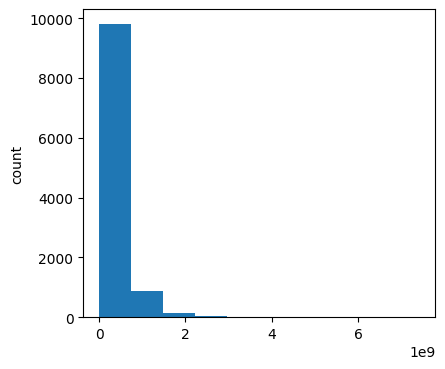

In [22]:
#Skewness 
for col in data.columns:
        print(col)
        print('Skew :', round(data[col].skew(), 2))
        plt.figure(figsize = (10, 4))
        plt.subplot(1, 2, 1)
        data[col].hist(grid=False)
        plt.ylabel('count')
        plt.show()  


Between  1980  and  1985
Close


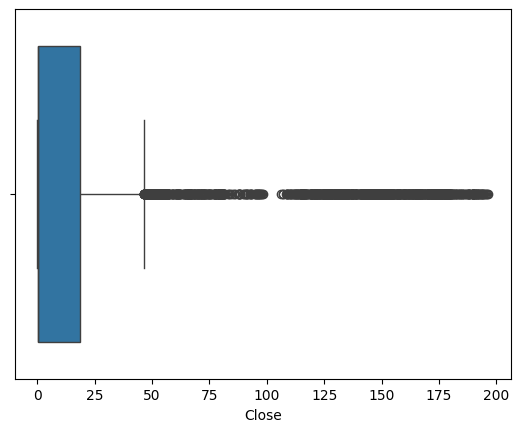

Open


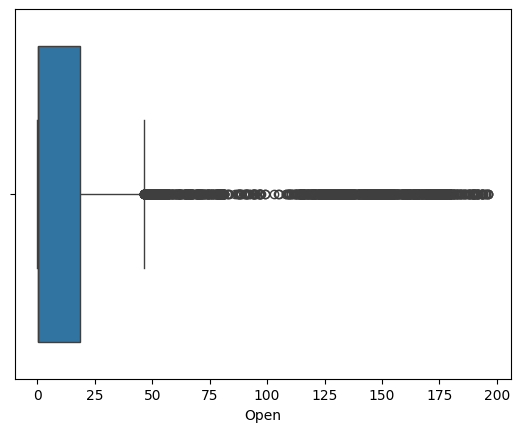

High


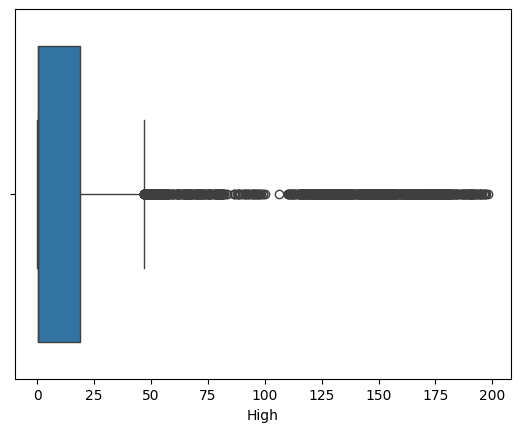

Low


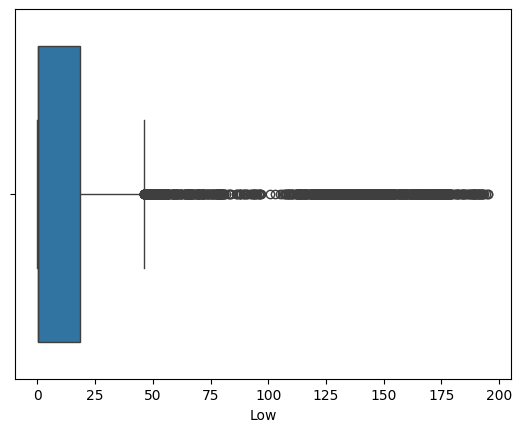

Between  1985  and  1990
Close


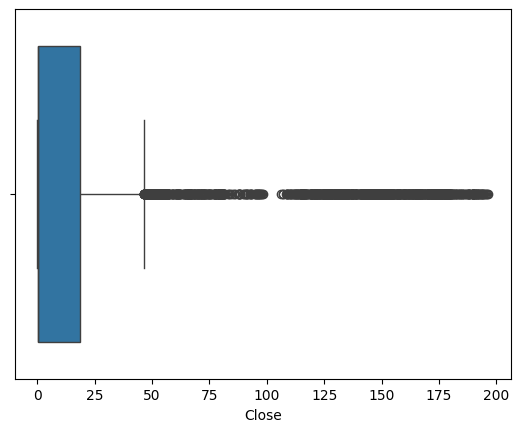

Open


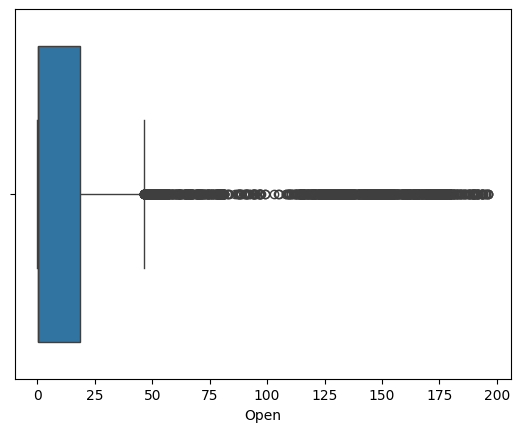

High


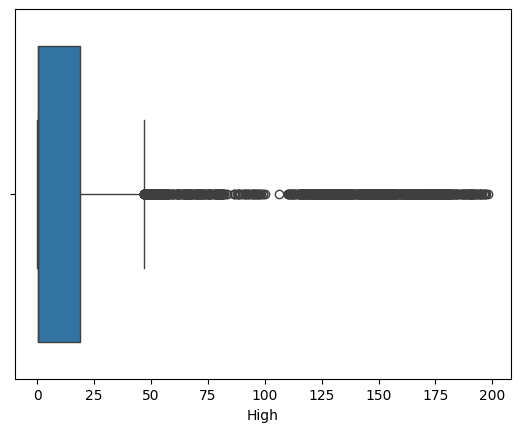

Low


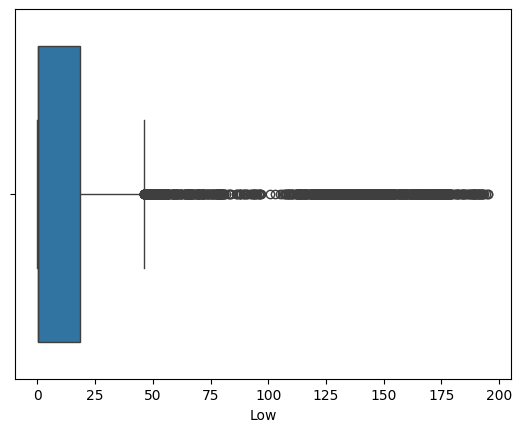

Between  1990  and  1995
Close


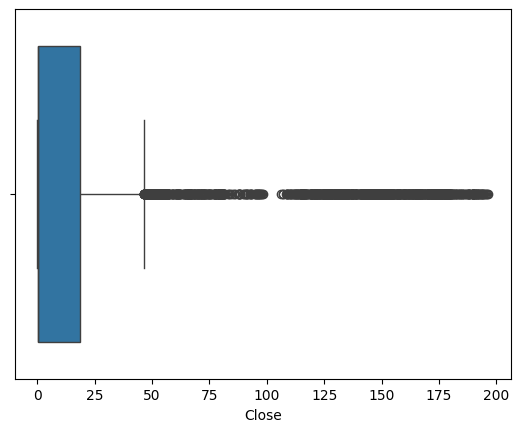

Open


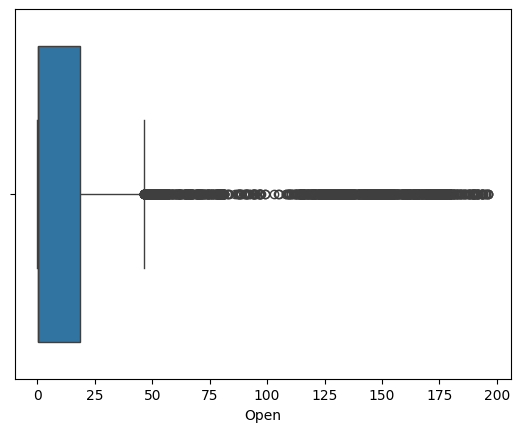

High


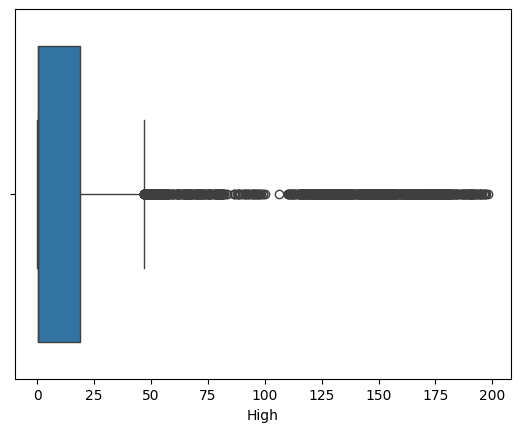

Low


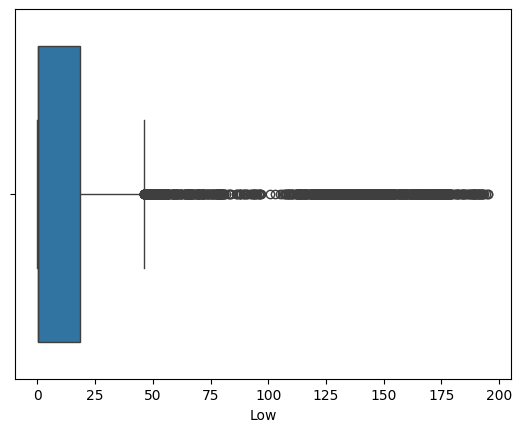

Between  1995  and  2000
Close


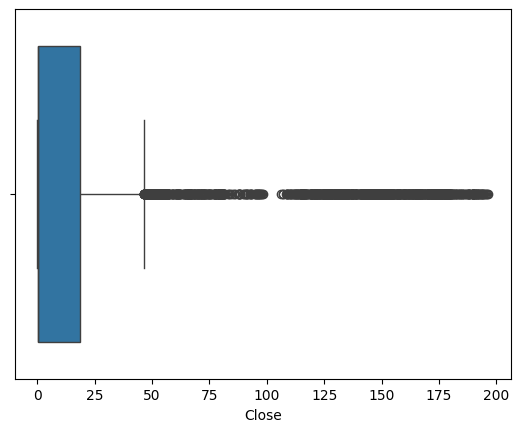

Open


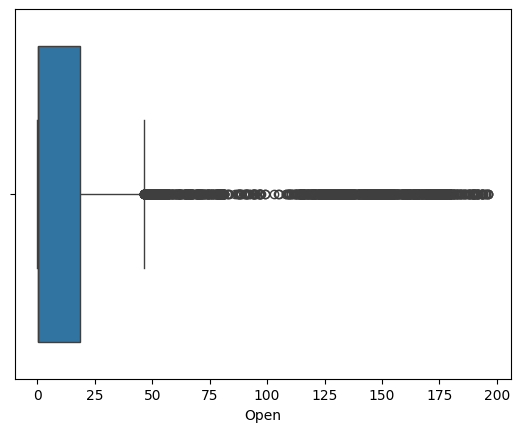

High


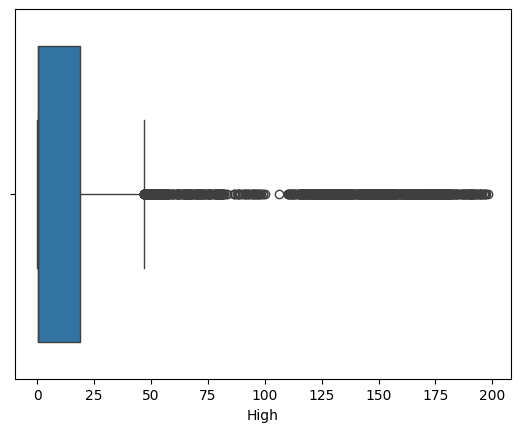

Low


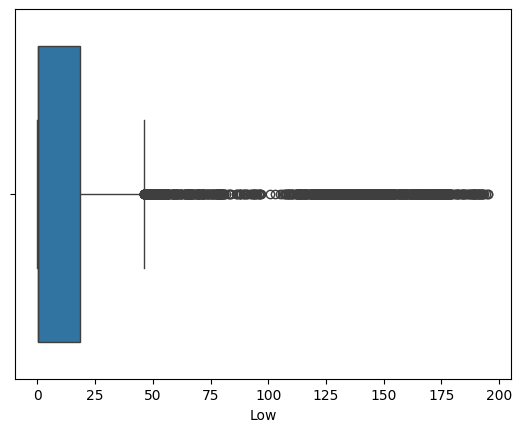

Between  2000  and  2005
Close


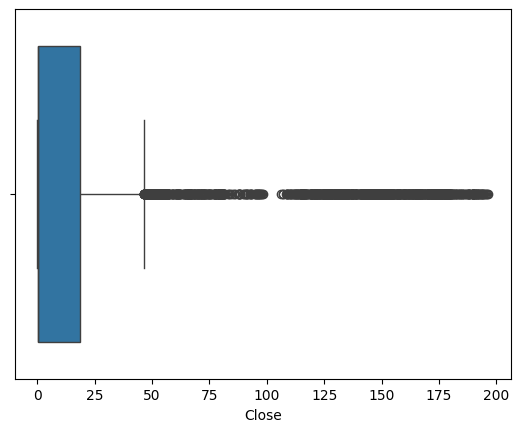

Open


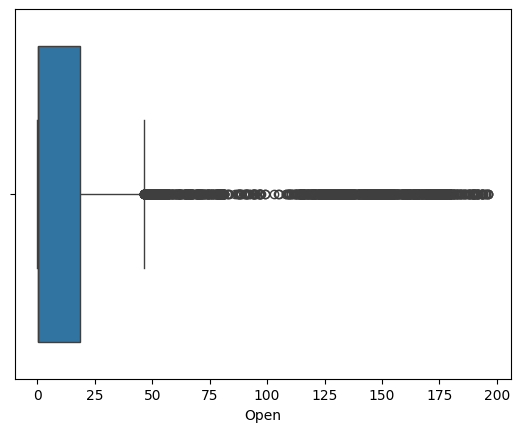

High


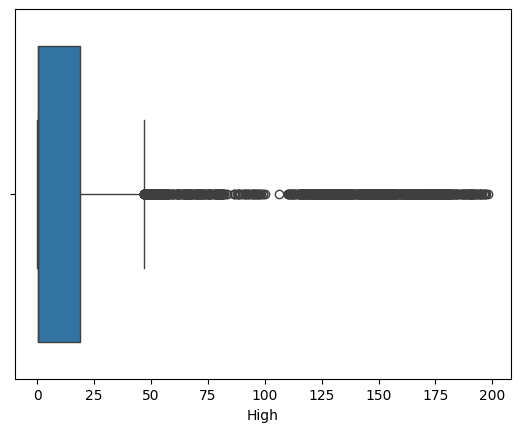

Low


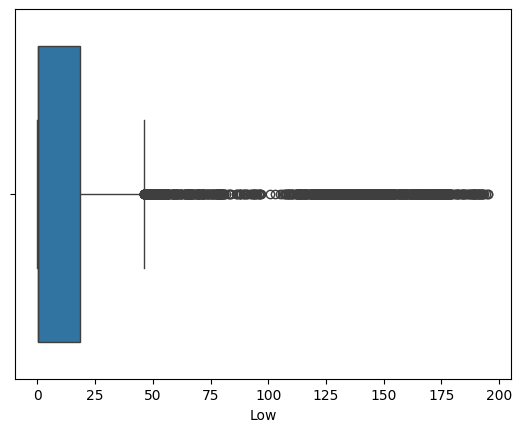

Between  2005  and  2010
Close


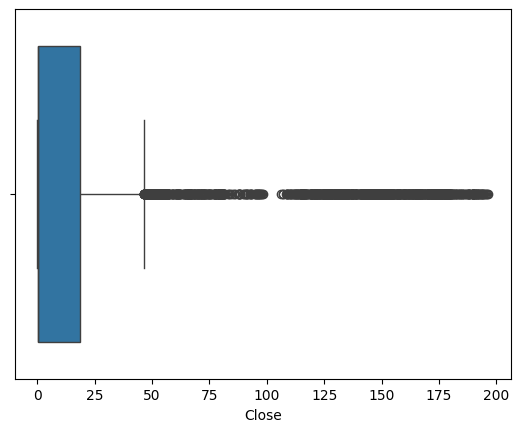

Open


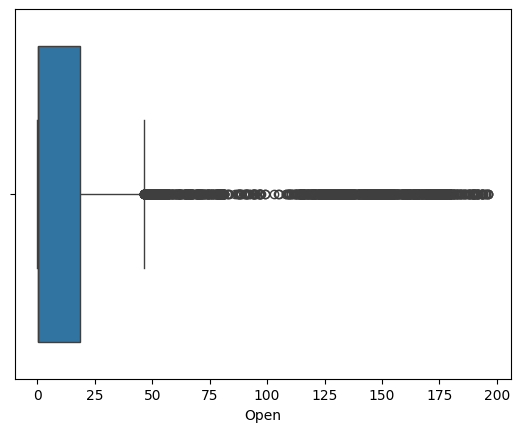

High


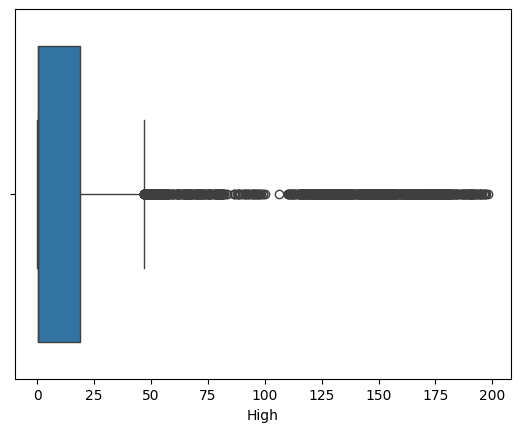

Low


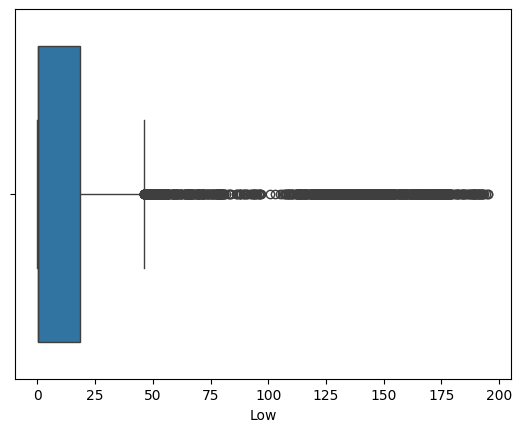

Between  2010  and  2015
Close


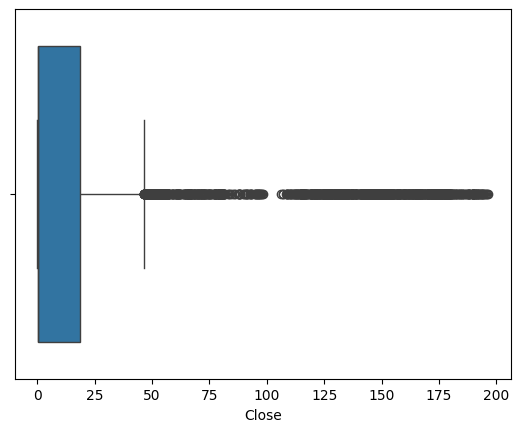

Open


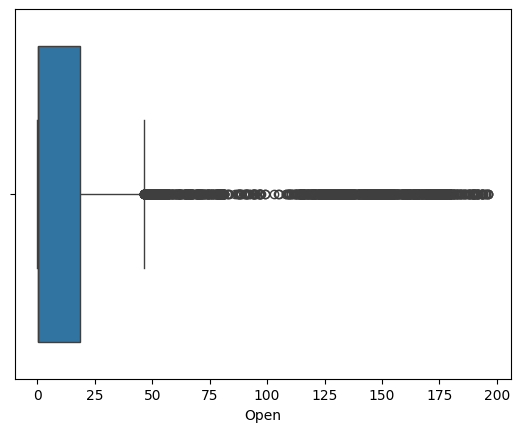

High


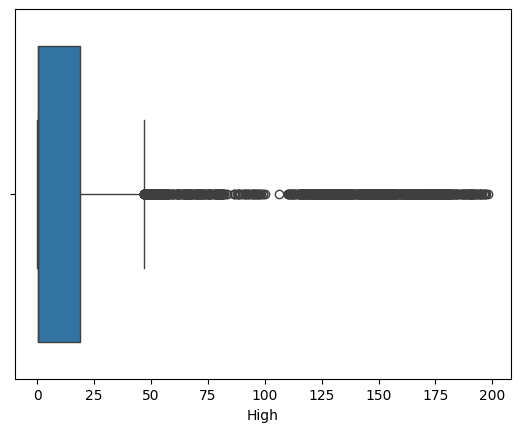

Low


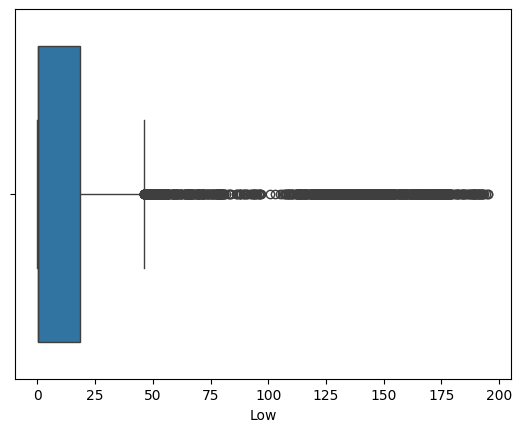

Between  2015  and  2020
Close


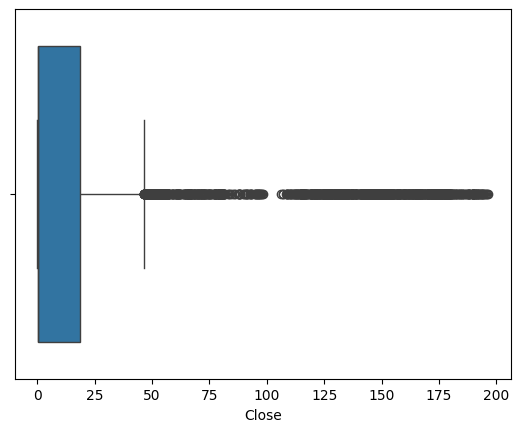

Open


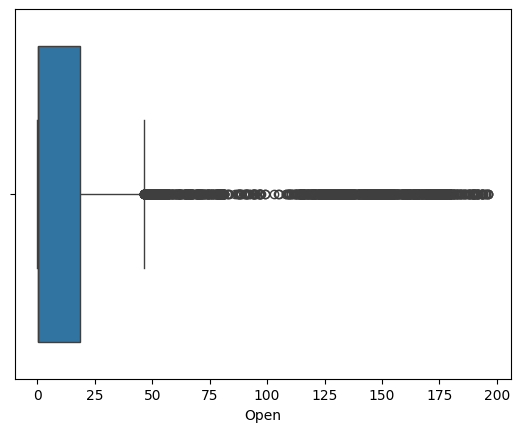

High


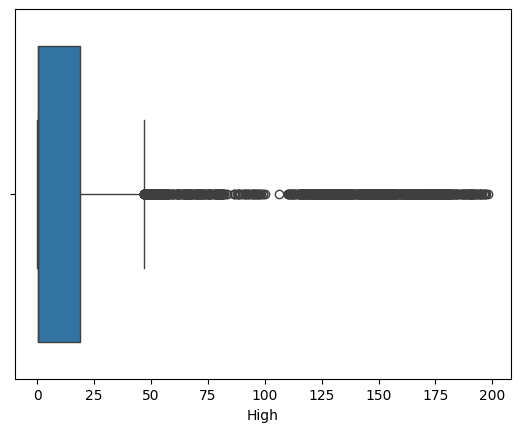

Low


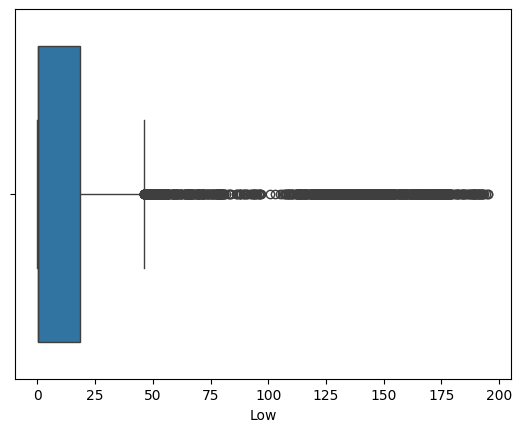

Between  2020  and  2025
Close


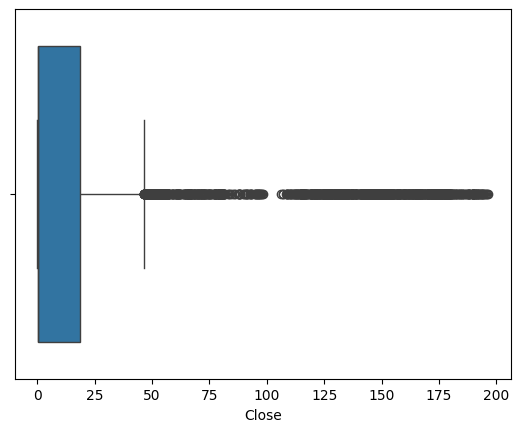

Open


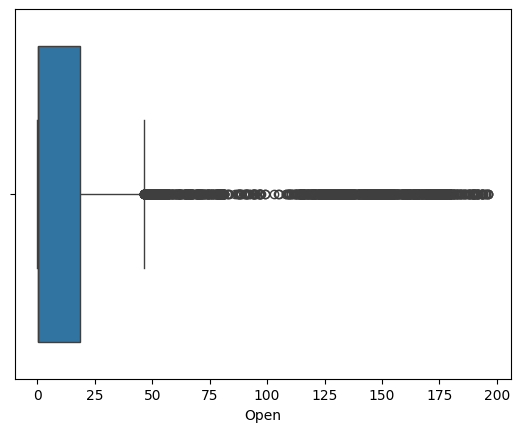

High


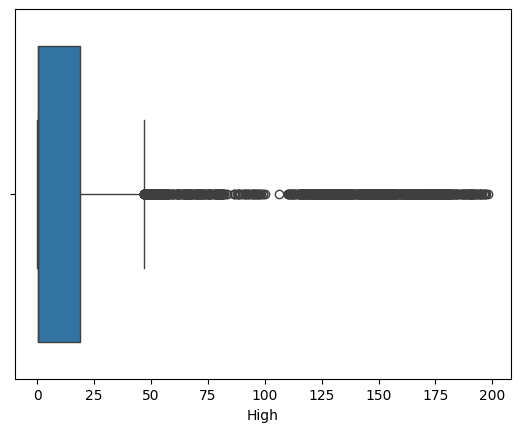

Low


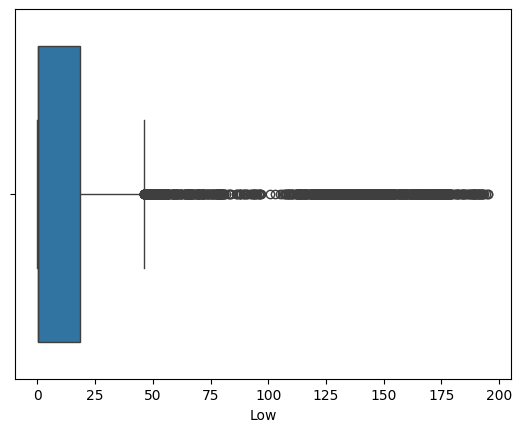

In [23]:
#Identifying Outliers----> Boxplot of  each field every 5 years to identify outliers
for i in range(data.index[0].year,data.index[-1].year,5):
        print("Between ",i," and ",i+5)
        for col in ['Close','Open','High','Low']:
                print(col)
                sns.boxplot(x=data[col]) 
                plt.show()  

In [24]:
import numpy as np

# Calculate the percentage of outliers in each column
def calculatePercentageOutliers(col):
    col_sorted = sorted(col)
    q1, q3 = np.percentile(col_sorted, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = (col < lower_bound) | (col > upper_bound)
    percentage_outliers = np.sum(outliers) / len(col) * 100
    return percentage_outliers

percentage_outliers_per_column = data.apply(calculatePercentageOutliers)

print("Percentage of outliers in each column:")
print(percentage_outliers_per_column)

Percentage of outliers in each column:
Open         12.002585
High         11.974887
Low          12.002585
Close        11.993352
Adj Close    13.341335
Volume        7.303111
dtype: float64


In [1073]:
'''
#Removing outliers
def removeOutlier(col):
    sorted(col)
    q1,q2=col.quantile([0.25,0.75])
    i=q2-q1
    l=q1-(1.5*i)
    h=q2+(1.5*i)
    return l,h
    
for i in range(data.index[0].year,data.index[-1].year,5):
    for col in data.columns:
        l,h=removeOutlier(data[col])
        data[col]=np.where(data[col]>h,h,data[col])
        data[col]=np.where(data[col]<l,l,data[col])
'''

#Not removing the outliers due to their vastness

In [25]:
##year end frequency
#Showing min values of each field of each year
data.resample(rule='A').min()

#AAPL
#Minimum change from 1980 to 2004
#Gradual rise from 2004 to 2019
#Drastic increase from 2019 to 2021
#Stable from 2021 to 2023

Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-31    0.113281    0.113281    0.112723    0.112723    0.087228   
1981-12-31    0.064174    0.064732    0.063616    0.063616    0.049228   
1982-12-31    0.049665    0.049665    0.049107    0.049107    0.038000   
1983-12-31    0.079799    0.085938    0.077009    0.079799    0.061750   
1984-12-31    0.101004    0.101563    0.097656    0.097656    0.075568   
1985-12-31    0.065290    0.065848    0.064732    0.064732    0.050091   
1986-12-31    0.098214    0.099330    0.097098    0.098772    0.076432   
1987-12-31    0.180246    0.183594    0.179129    0.182478    0.141206   
1988-12-31    0.319196    0.328125    0.316964    0.322545    0.252974   
1989-12-31    0.301339    0.308036    0.290179    0.301339    0.236994   
1990-12-31    0.225446    0.236607    0.216518    0.223214    0.178387   
1991-12-31    0.366071    0.375000    0.359375    0.367188    0.295802   
1992-12-31    0.375000    0.390625    0.370536    0.386161    0.314597   
1993-12-31    0.202009    0.205357    0.196429    0.202009    0.166356   
1994-12-31    0.224330    0.233259    0.219866    0.224330    0.186803   
1995-12-31    0.285714    0.289063    0.282366    0.284598    0.241248   
1996-12-31    0.155134    0.155134    0.142857    0.150670    0.127720   
1997-12-31    0.114955    0.118304    0.113839    0.115513    0.097918   
1998-12-31    0.121652    0.145089    0.120536    0.141741    0.120151   
1999-12-31    0.287946    0.299107    0.285714    0.287388    0.243613   
2000-12-31    0.246094    0.261161    0.243304    0.250000    0.211920   
2001-12-31    0.258929    0.272321    0.257813    0.265625    0.225165   
2002-12-31    0.241786    0.247321    0.238571    0.242679    0.205714   
2003-12-31    0.231964    0.235536    0.227143    0.234286    0.198600   
2004-12-31    0.382500    0.388393    0.378214    0.380000    0.322118   
2005-12-31    1.139107    1.159107    1.117857    1.130179    0.958030   
2006-12-31    1.847500    1.888929    1.791429    1.809643    1.533998   
2007-12-31    2.964286    3.016786    2.925000    2.973929    2.520940   
2008-12-31    2.926071    3.004286    2.826429    2.874643    2.436776   
2009-12-31    2.835357    2.928571    2.792857    2.792857    2.367448   
2010-12-31    6.870357    7.000000    6.794643    6.858929    5.814175   
2011-12-31   11.310000   11.346429   11.089286   11.261429    9.546086   
2012-12-31   14.621429   14.732143   14.607143   14.686786   12.449691   
2013-12-31   13.856071   14.271429   13.753571   13.947500   11.997521   
2014-12-31   17.684999   17.911785   17.626785   17.849285   15.648317   
2015-12-31   23.717501   26.757500   23.000000   25.780001   23.369896   
2016-12-31   22.500000   22.917500   22.367500   22.584999   20.798660   
2017-12-31   28.950001   29.082500   28.690001   29.004999   26.993458   
2018-12-31   37.037498   37.887501   36.647499   36.707500   35.232262   
2019-12-31   35.994999   36.430000   35.500000   35.547501   34.118874   
2020-12-31   57.020000   57.125000   53.152500   56.092499   54.776802   
2021-12-31  119.029999  120.400002  116.209999  116.360001  114.511497   
2022-12-31  127.989998  129.949997  125.870003  126.040001  125.339409   
2023-12-31  126.010002  127.769997  124.169998  125.019997  124.325081   

               Volume  
Date                   
1980-12-31   35750400  
1981-12-31          0  
1982-12-31   13596800  
1983-12-31    1388800  
1984-12-31   27686400  
1985-12-31   21504000  
1986-12-31   50176000  
1987-12-31   56638400  
1988-12-31   29937600  
1989-12-31   27854400  
1990-12-31   44273600  
1991-12-31   17987200  
1992-12-31    2396800  
1993-12-31   39592000  
1994-12-31   62272000  
1995-12-31   39390400  
1996-12-31   42291200  
1997-12-31   41316800  
1998-12-31  111115200  
1999-12-31  123681600  
2000-12-31   70828800  
2001-12-31   50629600  
2002-12-31   39340000  
2003-12-31   

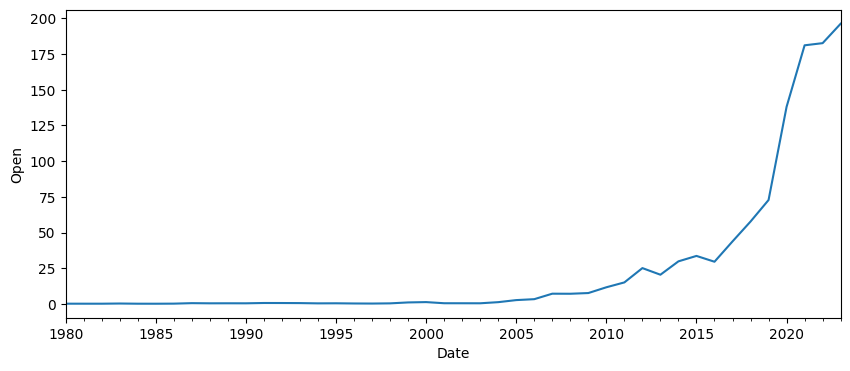

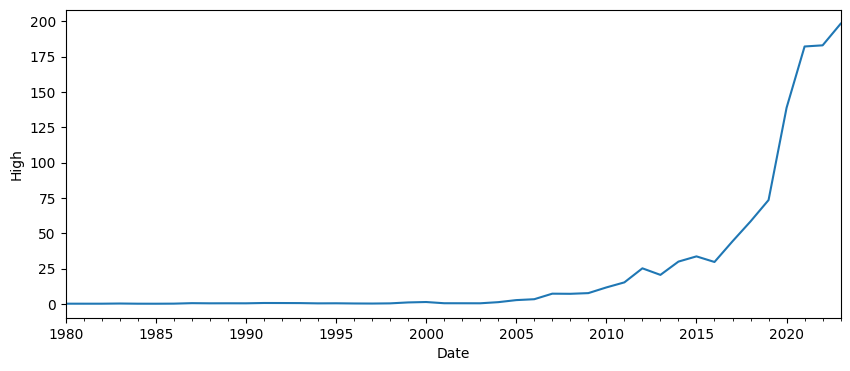

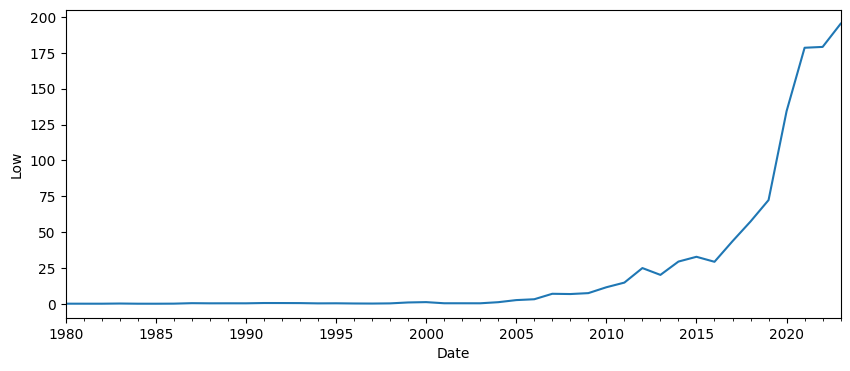

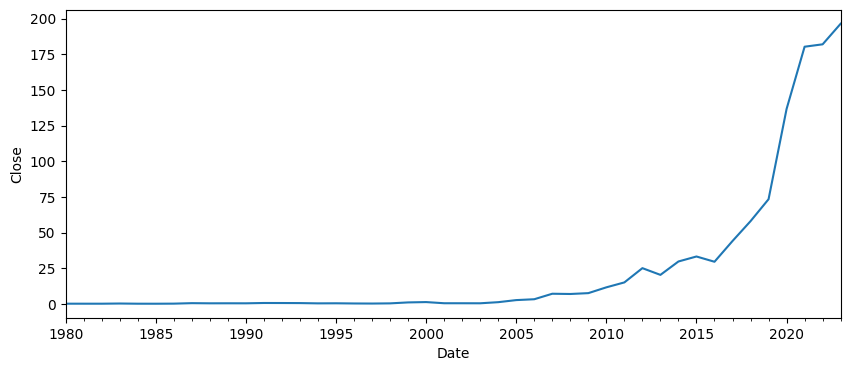

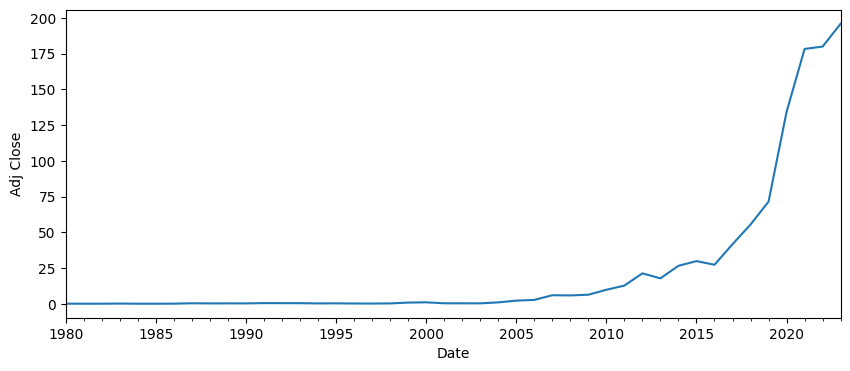

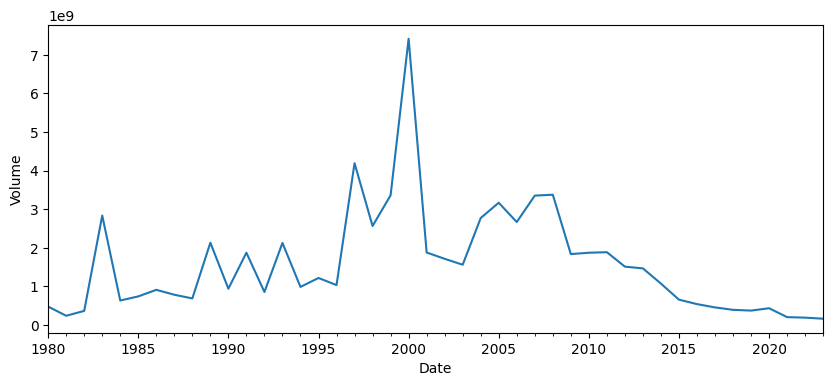

In [26]:
#Graph depicting drastic rise for each column

for col in data.columns:    
    data.resample(rule='A').max()[col].plot(ylabel=col,figsize=(10,4))
    plt.show()

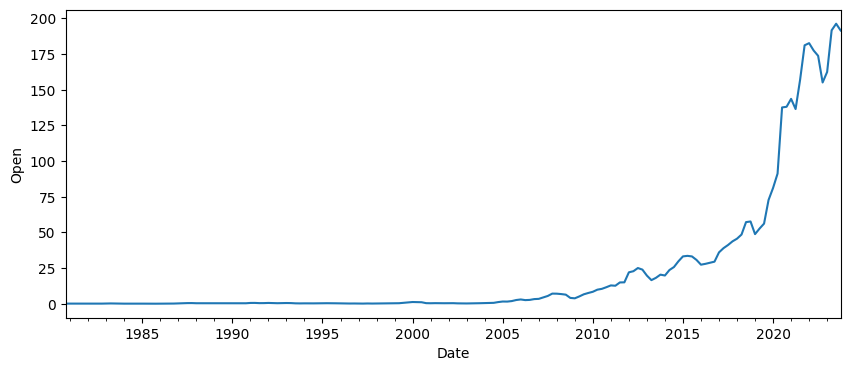

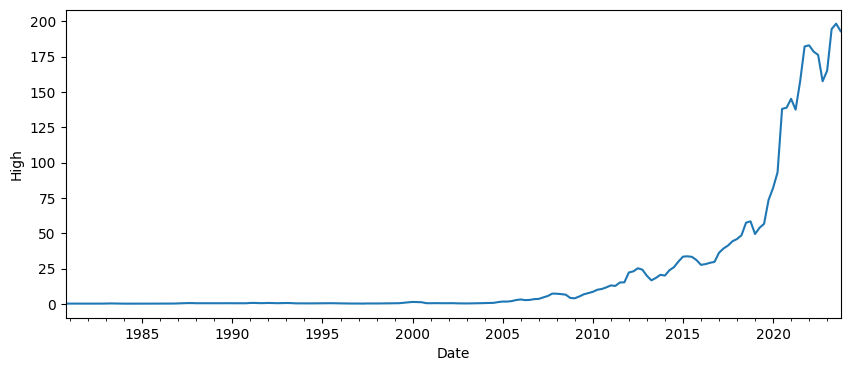

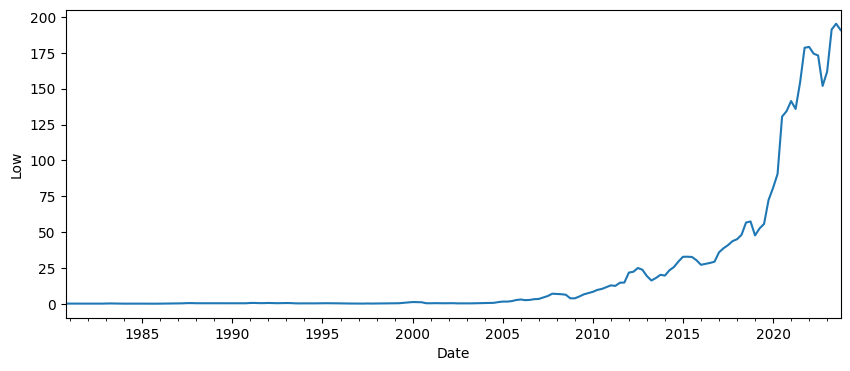

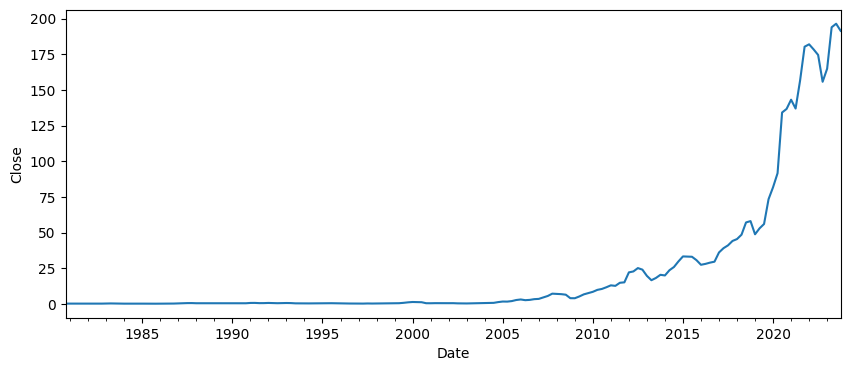

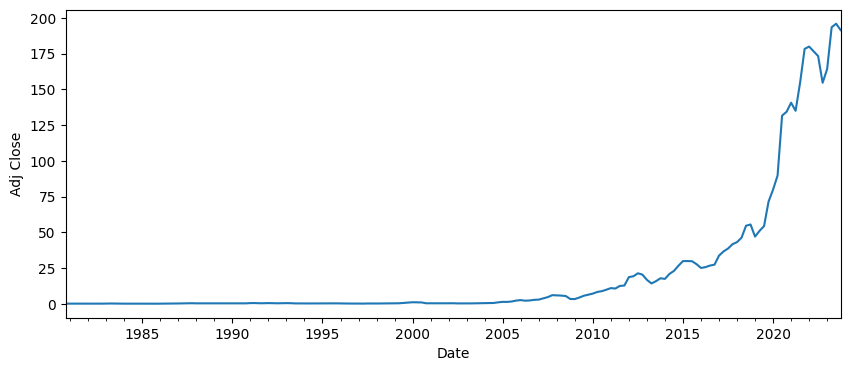

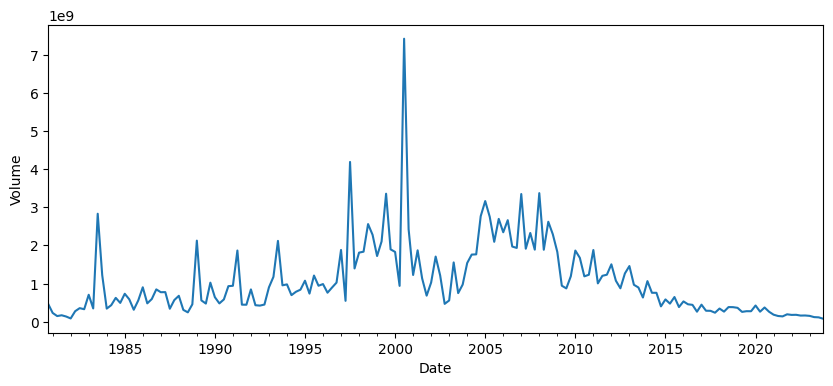

In [1155]:
#Quaterly start frequency
for col in data.columns:    
    data.resample(rule='QS').max()[col].plot(ylabel=col,figsize=(10,4))
    plt.show()
#A little more specific but same general flow as year end

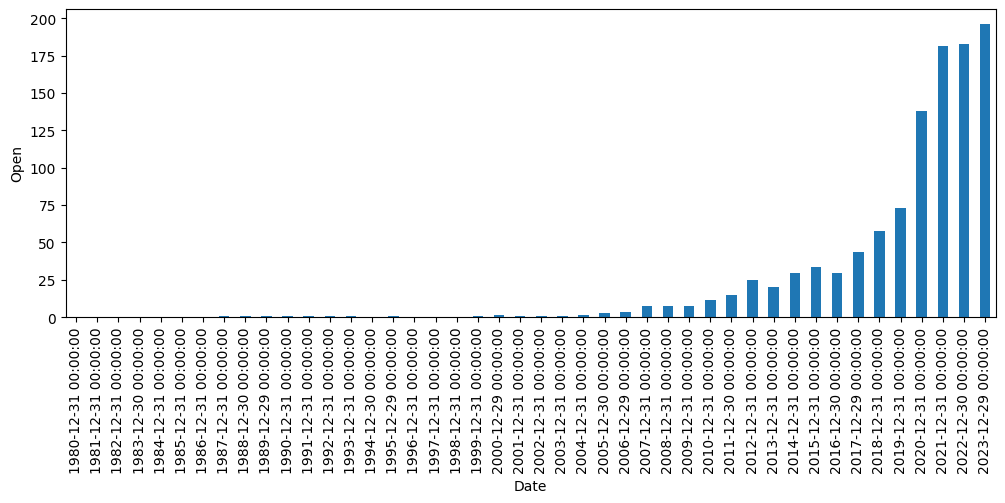

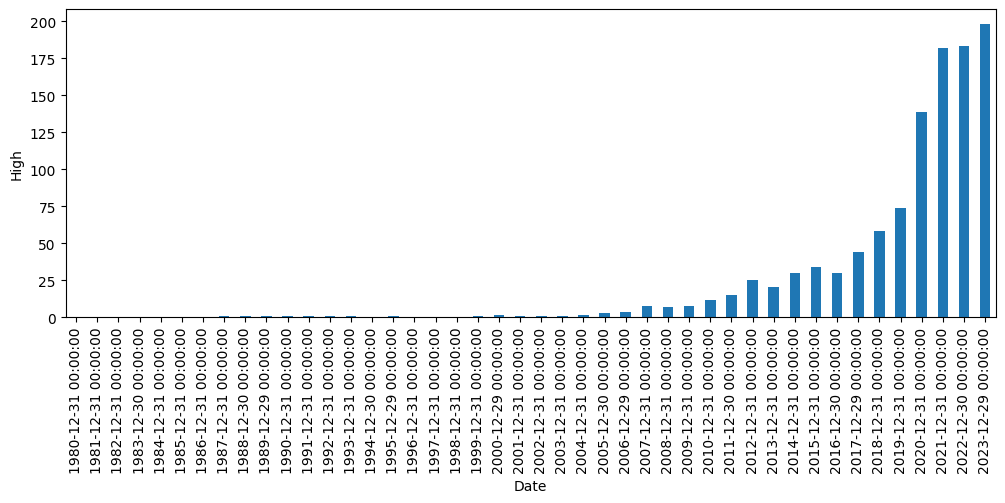

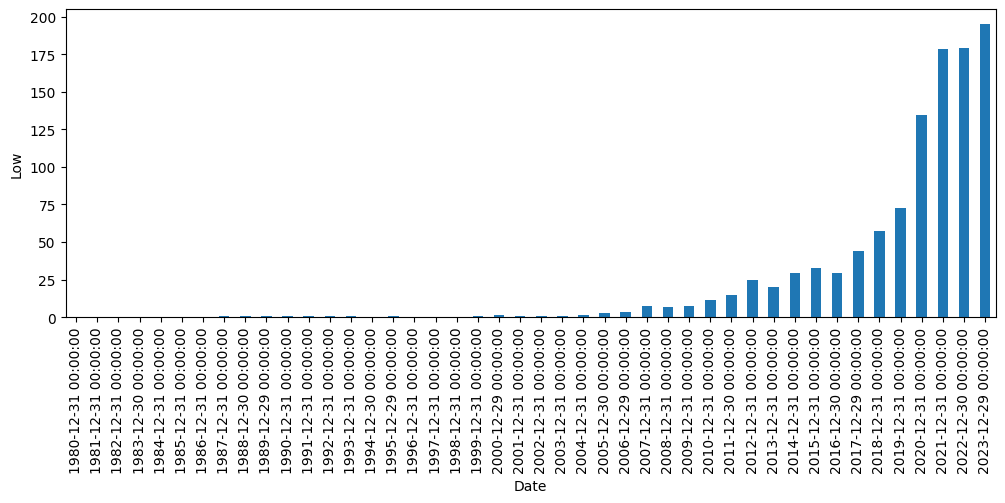

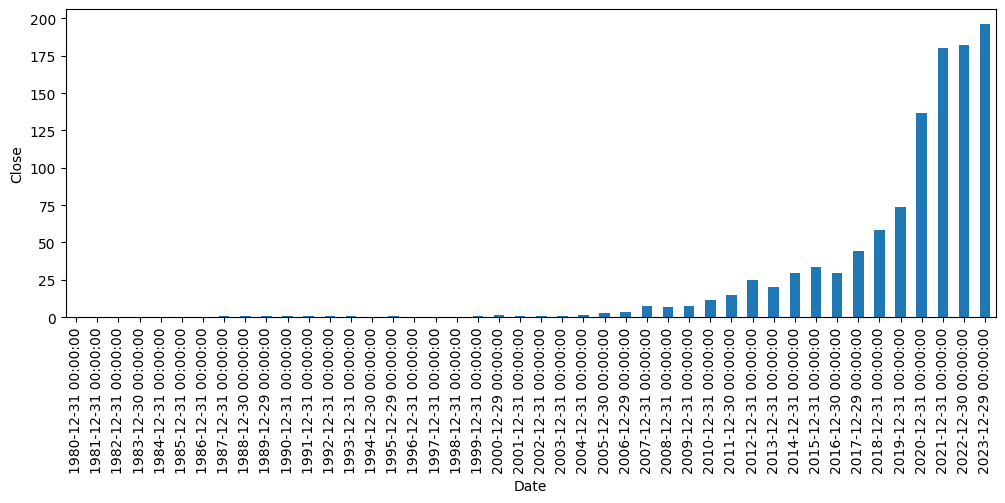

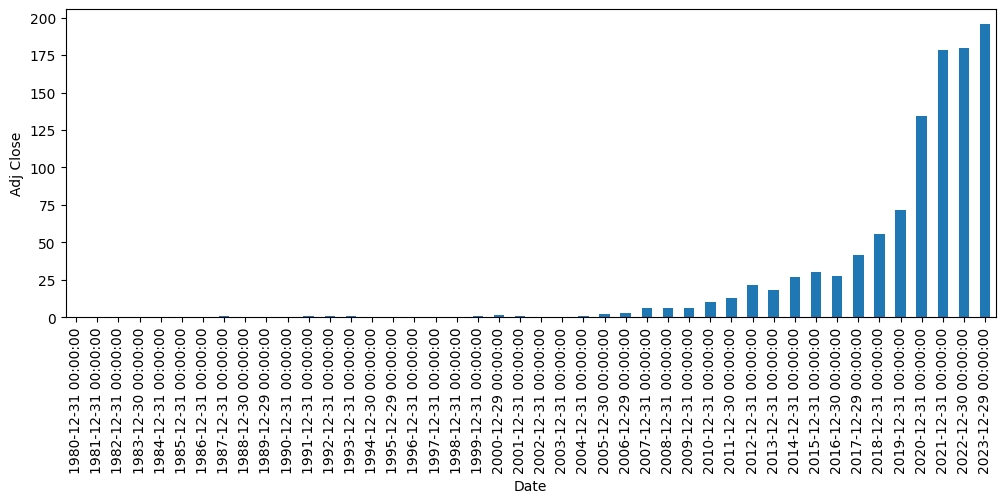

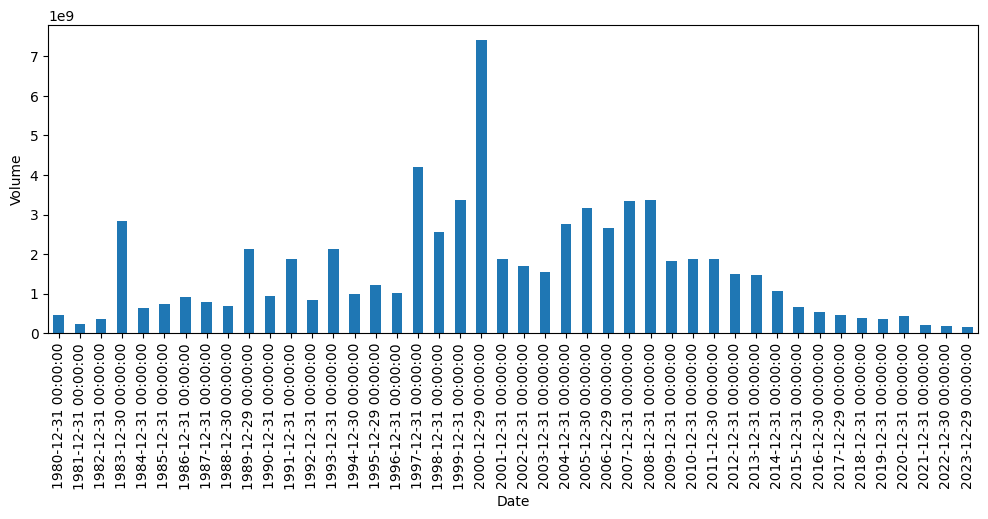

In [1162]:
##Business End frequency
i=1
for col in data.columns:  
    data[col].resample(rule='BA').max().plot(kind='bar',figsize=(12,4),ylabel=col)
    plt.show()


In [28]:
#Normalisation

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
trainDataScaled=sc.fit_transform(data)
trainDataScaled

array([[4.01054405e-04, 3.99842909e-04, 4.05883512e-04, 4.03465585e-04,
        3.13029388e-04, 6.31981003e-02],
       [3.69768461e-04, 3.66055499e-04, 3.71585661e-04, 3.69372053e-04,
        2.86575625e-04, 2.36989104e-02],
       [3.24256536e-04, 3.21000574e-04, 3.25850071e-04, 3.23908919e-04,
        2.51305643e-04, 1.42459064e-02],
       ...,
       [9.72628571e-01, 9.63013474e-01, 9.69113500e-01, 9.67006280e-01,
        9.69590144e-01, 3.24029425e-03],
       [9.67786350e-01, 9.61852935e-01, 9.67320720e-01, 9.66089746e-01,
        9.68671215e-01, 5.46410168e-03],
       [9.67072762e-01, 9.63921778e-01, 9.69881790e-01, 9.69195644e-01,
        9.71785229e-01, 5.16978671e-03]])

In [29]:
#Check if data is stationery or not
#ADF Test
from statsmodels.tsa.stattools import adfuller

def adfuller_test(stock):
    result=adfuller(stock)
    labels=['ADF Test Statistic','p-value','#Laggs Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    
    if result[1]<=0.05:
        print("Reject null hypothesis. Data is stationery.")
    else: 
        print("Accept null hypothesis. Data is non-stationery.")

for col in data.columns:
    print("\n",col," data: ")
    adfuller_test(data[col])

#this dataset has a clear upward trend so its obv not stationery


 Open  data: 
ADF Test Statistic : 3.3218860649869604
p-value : 1.0
#Laggs Used : 38
Number of Observations : 10792
Accept null hypothesis. Data is non-stationery.

 High  data: 
ADF Test Statistic : 3.513596460862004
p-value : 1.0
#Laggs Used : 39
Number of Observations : 10791
Accept null hypothesis. Data is non-stationery.

 Low  data: 
ADF Test Statistic : 3.646441293772961
p-value : 1.0
#Laggs Used : 39
Number of Observations : 10791
Accept null hypothesis. Data is non-stationery.

 Close  data: 
ADF Test Statistic : 3.4876761364837487
p-value : 1.0
#Laggs Used : 39
Number of Observations : 10791
Accept null hypothesis. Data is non-stationery.

 Adj Close  data: 
ADF Test Statistic : 3.654202883480604
p-value : 1.0
#Laggs Used : 39
Number of Observations : 10791
Accept null hypothesis. Data is non-stationery.

 Volume  data: 
ADF Test Statistic : -5.404639321636467
p-value : 3.312029223688712e-06
#Laggs Used : 33
Number of Observations : 10797
Reject null hypothesis. Data is stat


 Open


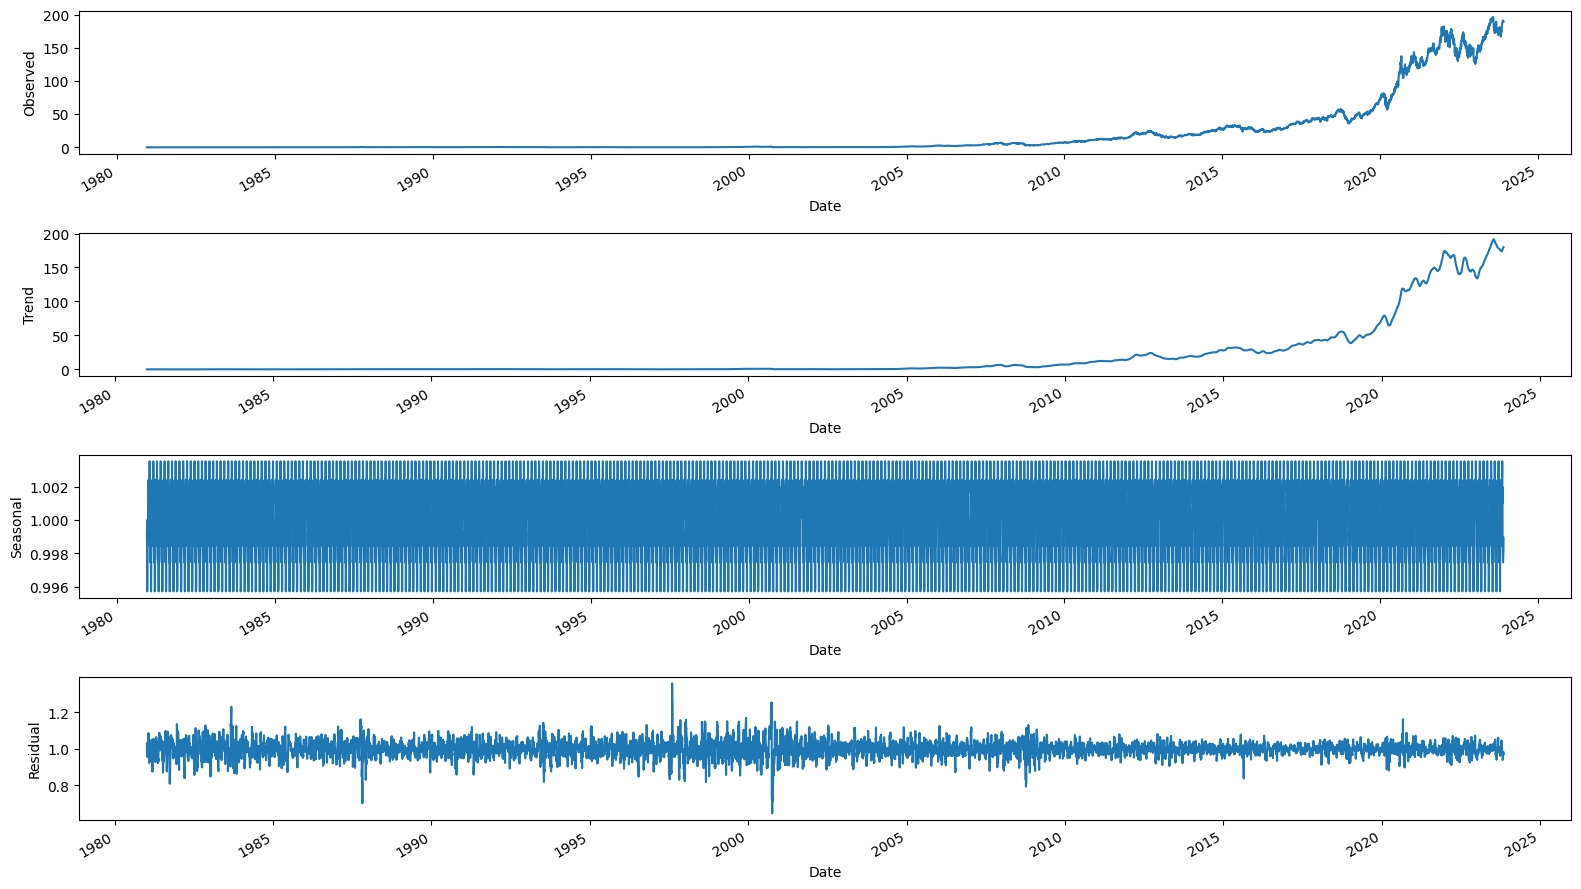


 High


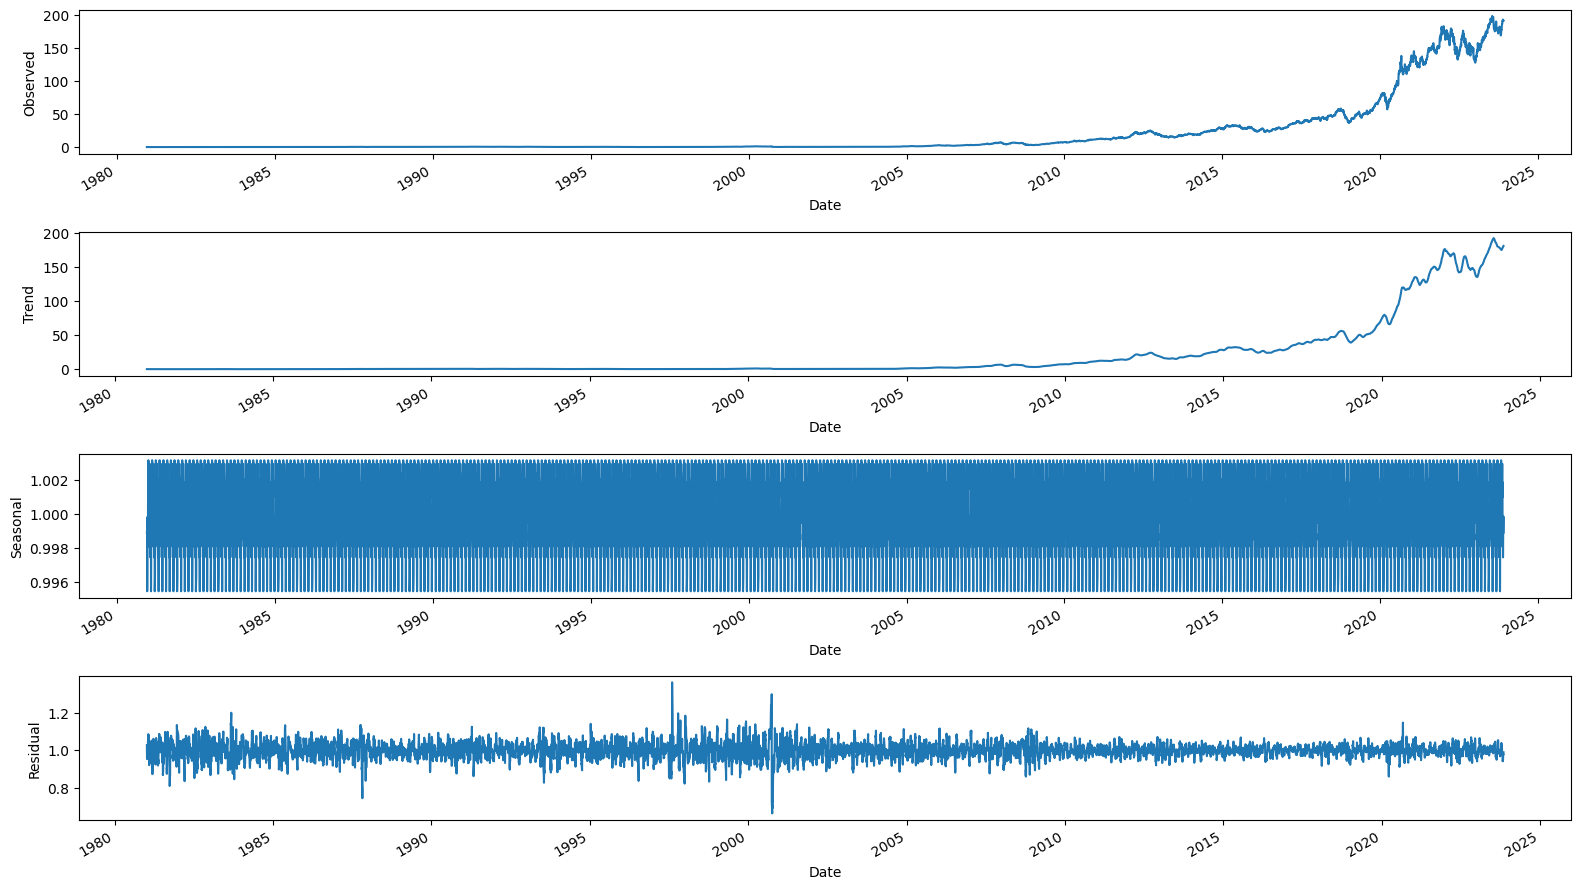


 Low


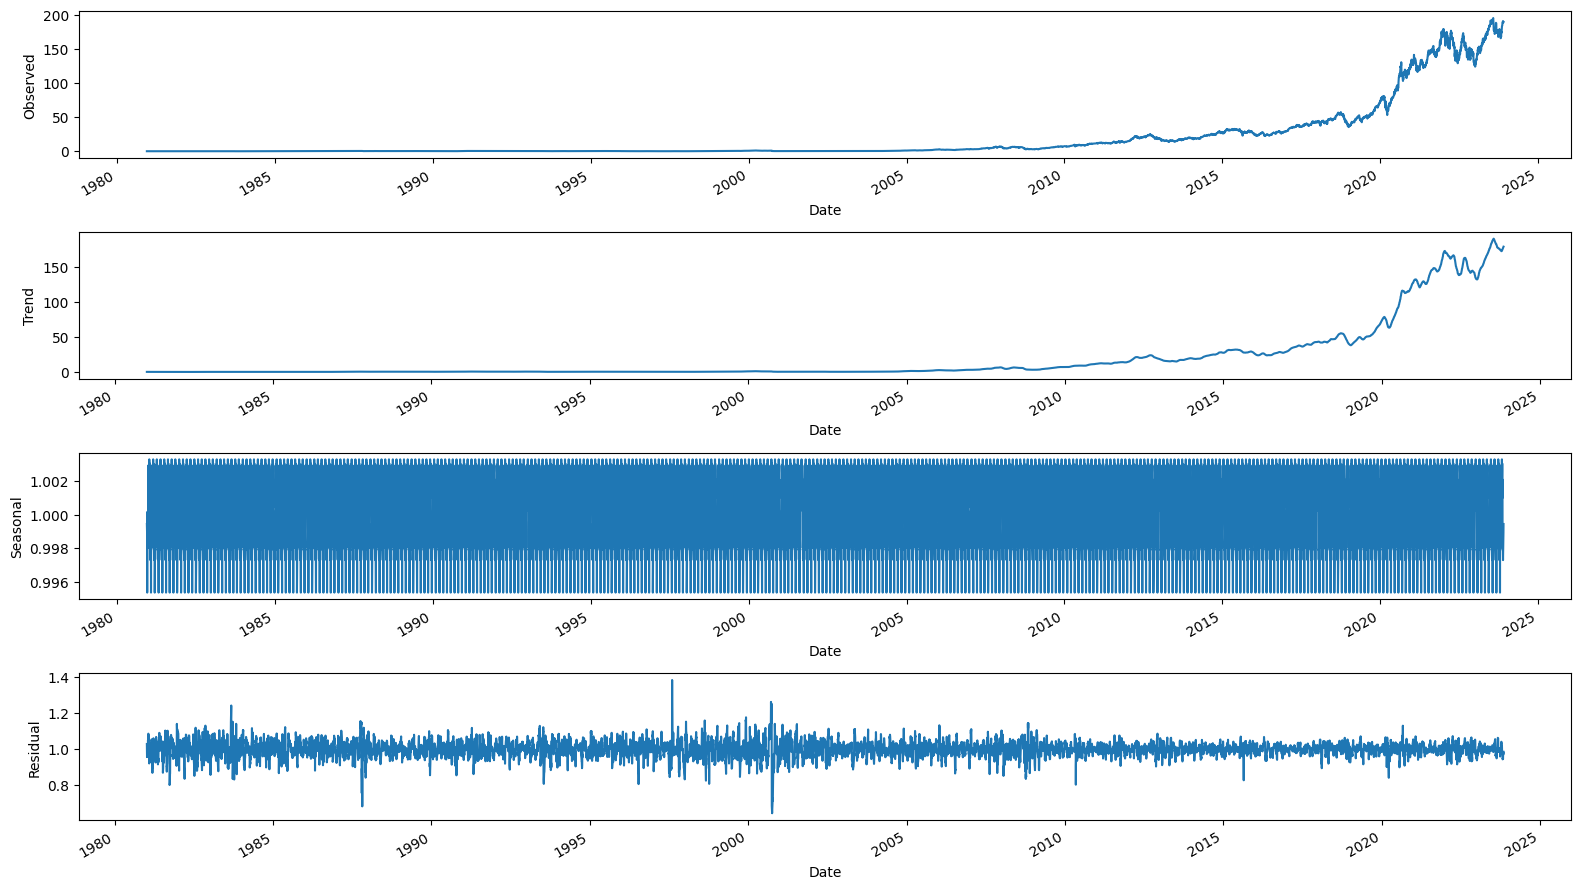


 Close


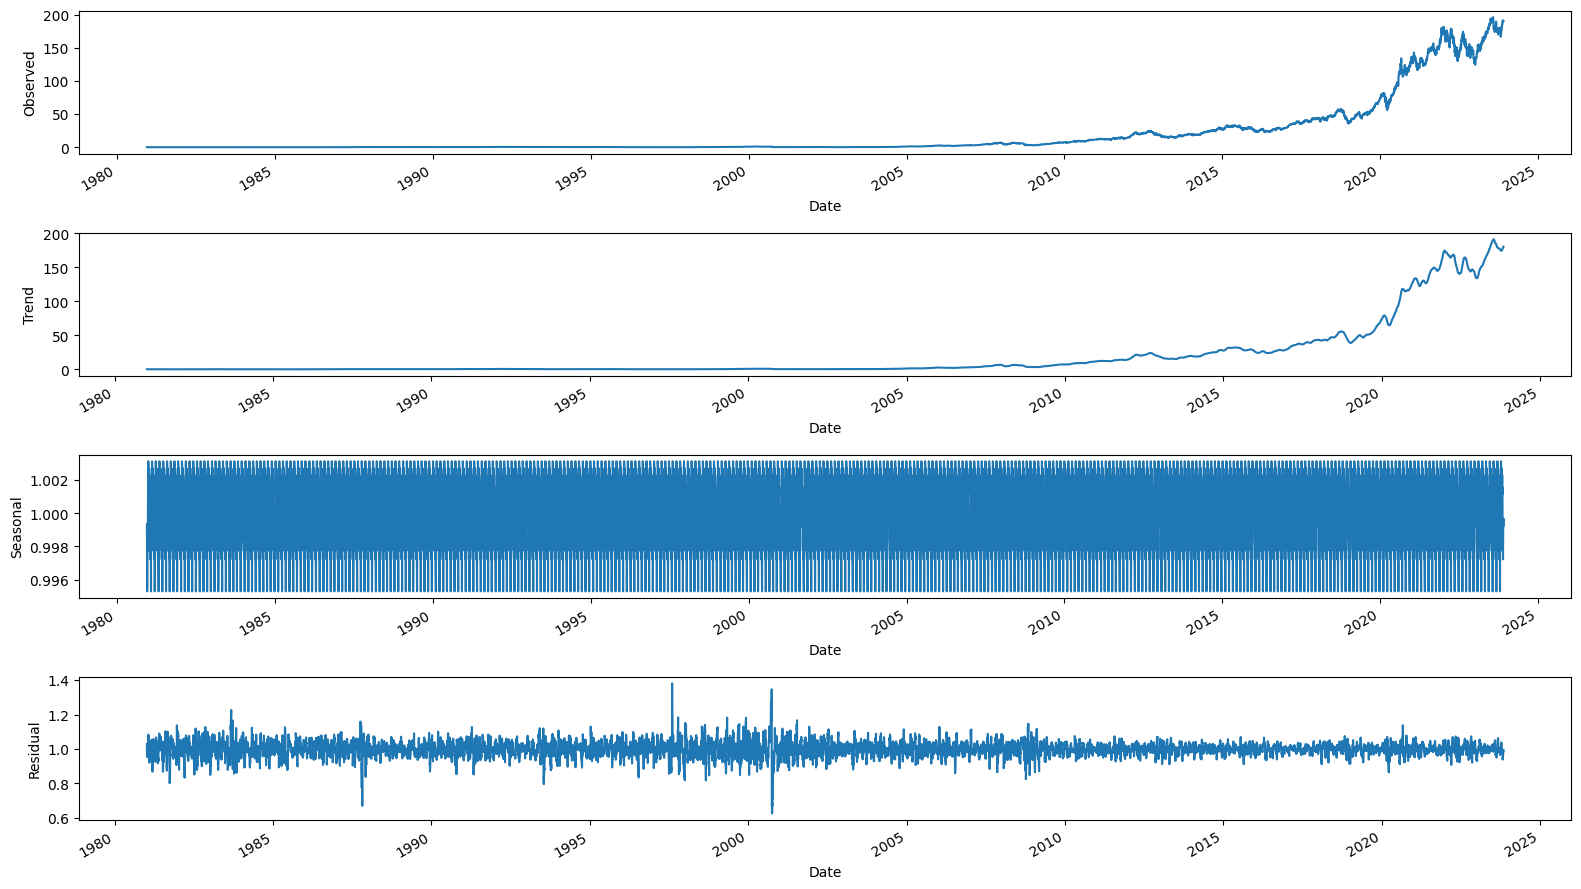


 Adj Close


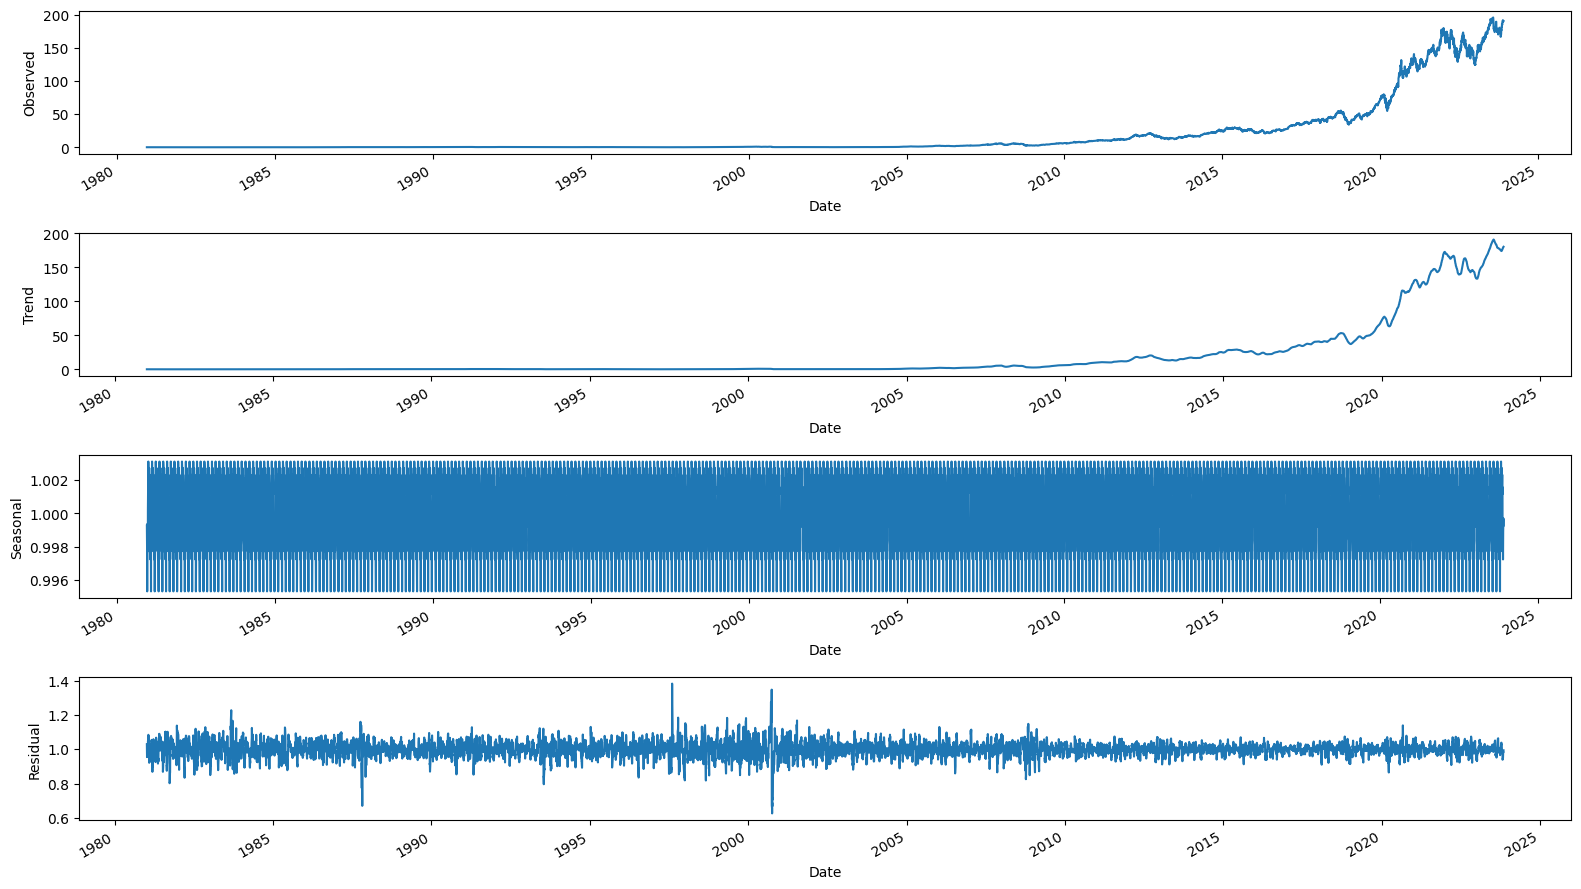

In [30]:
#Trend,seasonality,residuals

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

for col in data.columns:
    if  col!='Volume':
        print("\n",col)
        result = seasonal_decompose(data[col], model='multiplicative', period=30)

        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 9))

        result.observed.plot(ax=ax1)
        ax1.set_ylabel('Observed')

        result.trend.plot(ax=ax2)
        ax2.set_ylabel('Trend')

        result.seasonal.plot(ax=ax3)
        ax3.set_ylabel('Seasonal')

        result.resid.plot(ax=ax4)
        ax4.set_ylabel('Residual')

        plt.tight_layout()
        plt.show()
    else:
        continue



 Open


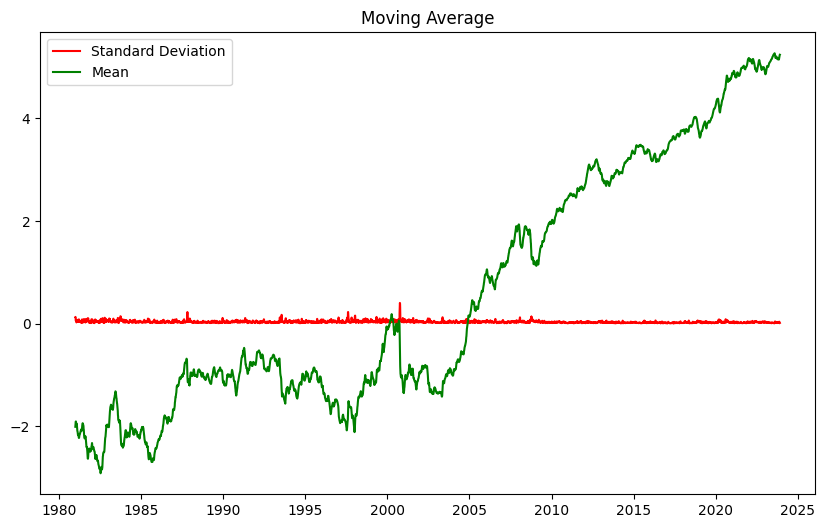


 High


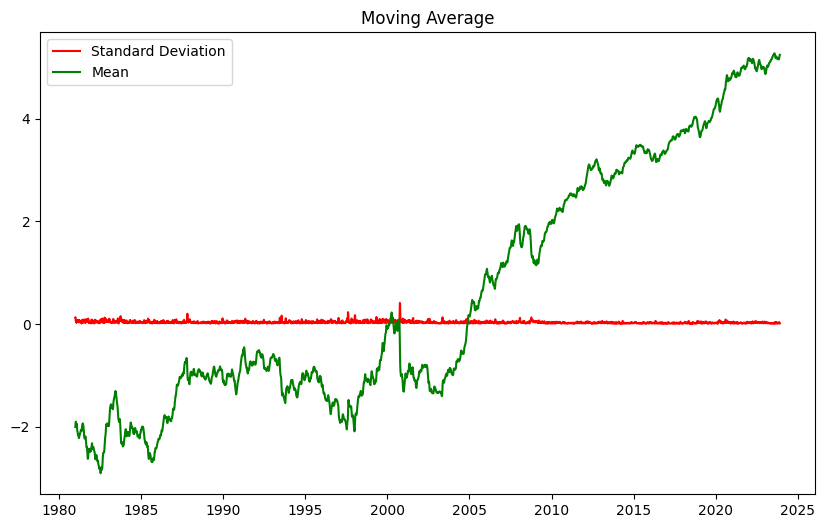


 Low


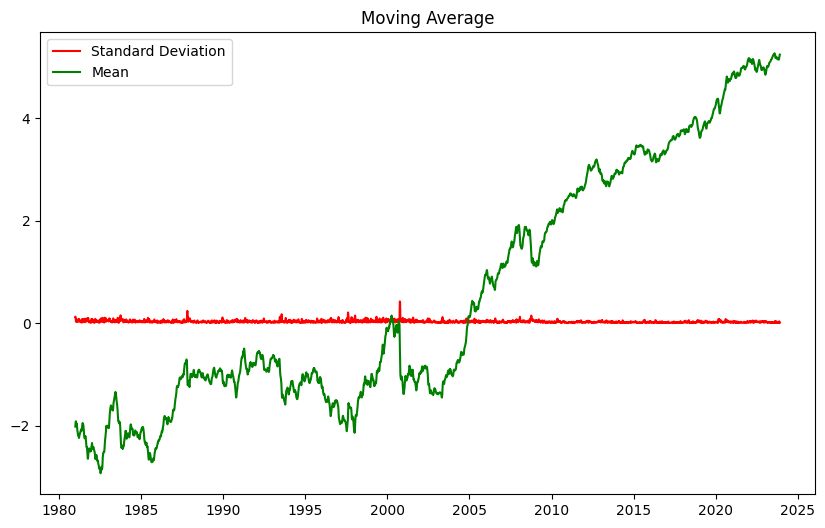


 Close


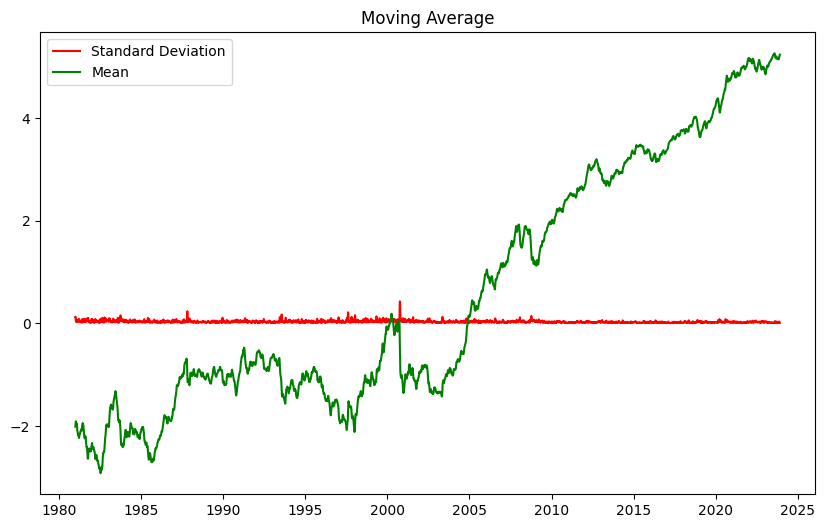


 Adj Close


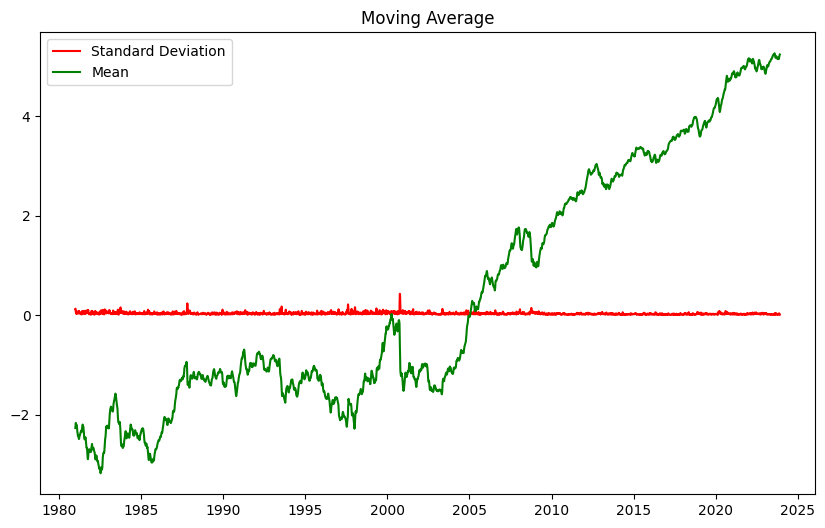


 Volume


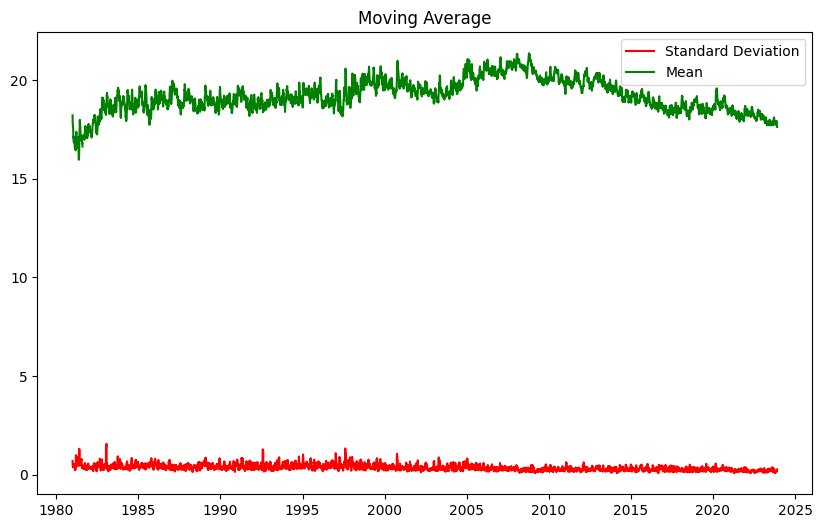

In [31]:
##Moving Average and Standard Deviation 
from pylab import rcParams

rcParams['figure.figsize']=10,6
for col in data.columns: 
    print("\n",col)
    data_log=np.log(data[col])
    movingAvg=data_log.rolling(12).mean()
    std=data_log.rolling(12).std()
    plt.title('Moving Average')
    plt.plot(std,color='red',label='Standard Deviation')
    plt.plot(movingAvg,color='green',label='Mean')
    plt.legend()
    plt.show()
    


In [1042]:
##Time Series Forecasting

In [8]:
import matplotlib.pyplot as plt

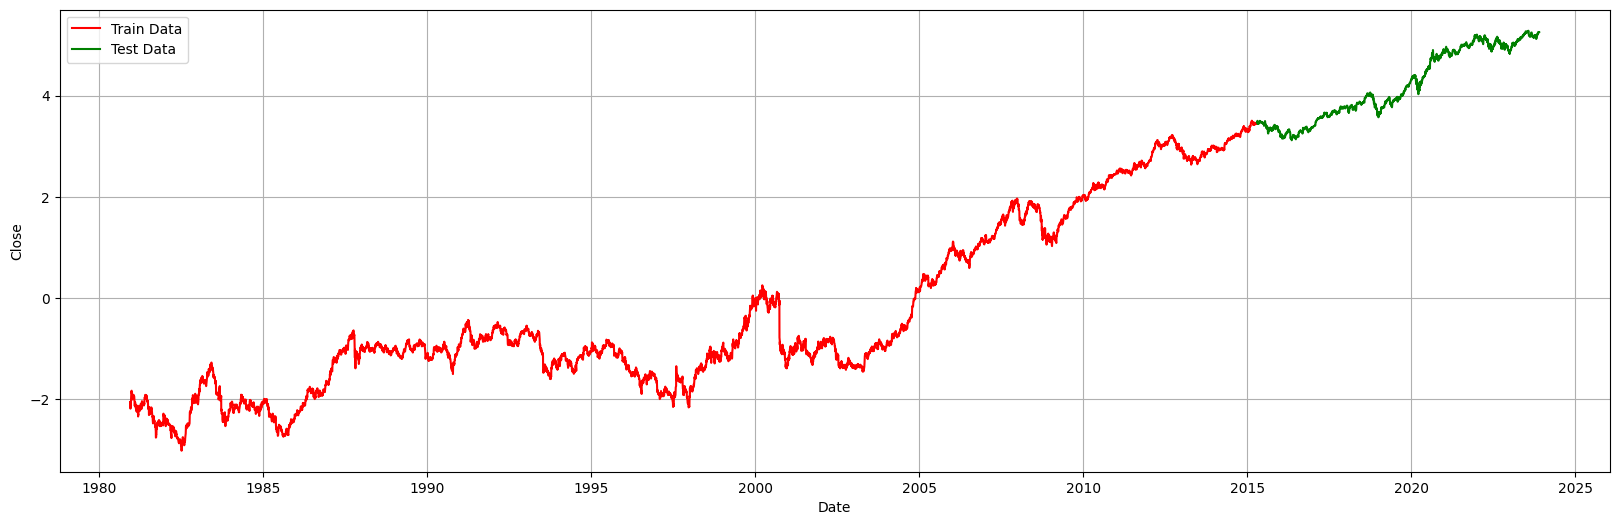

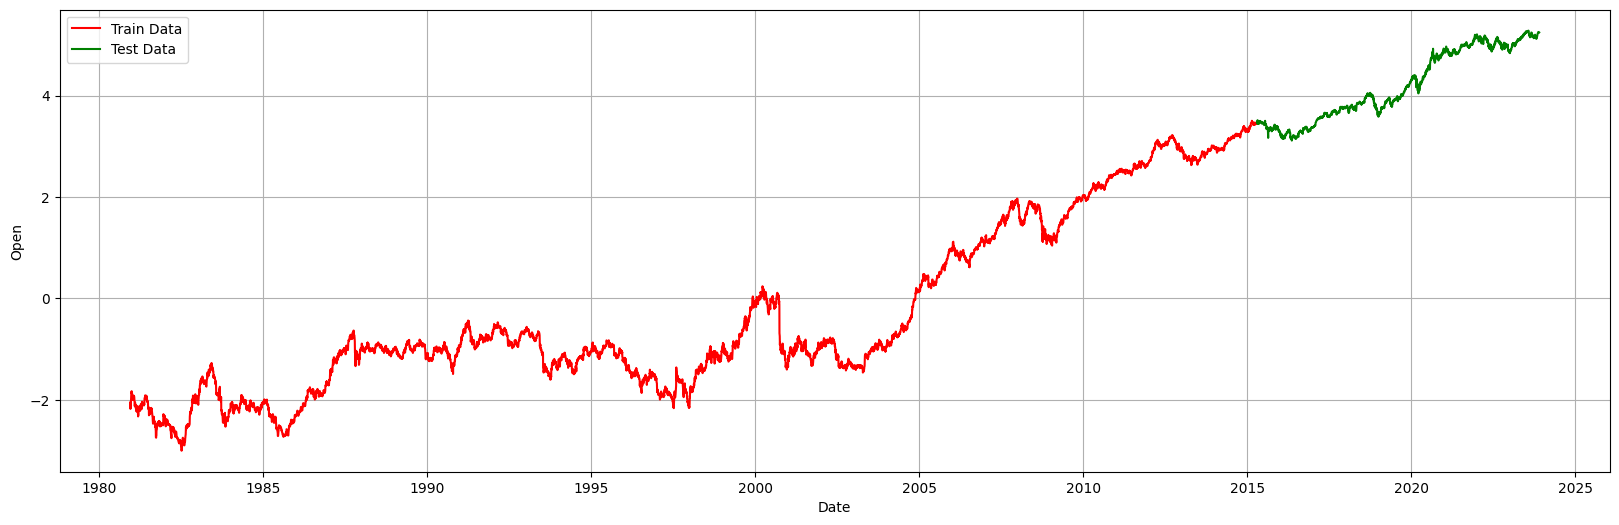

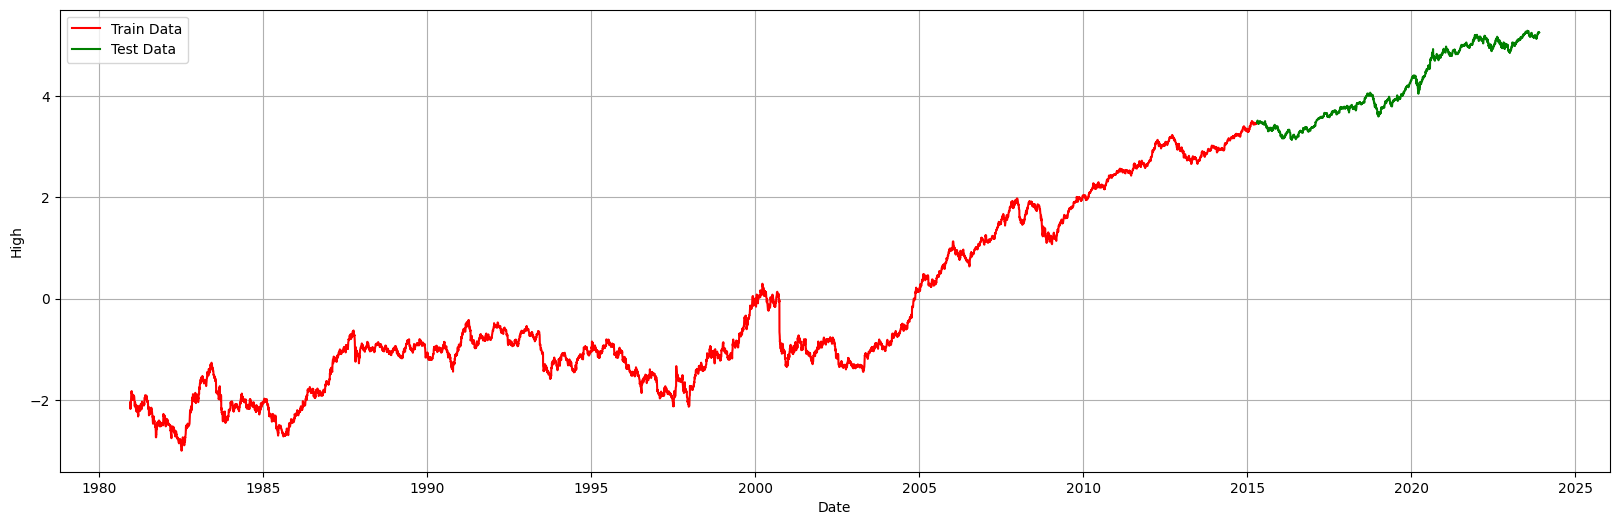

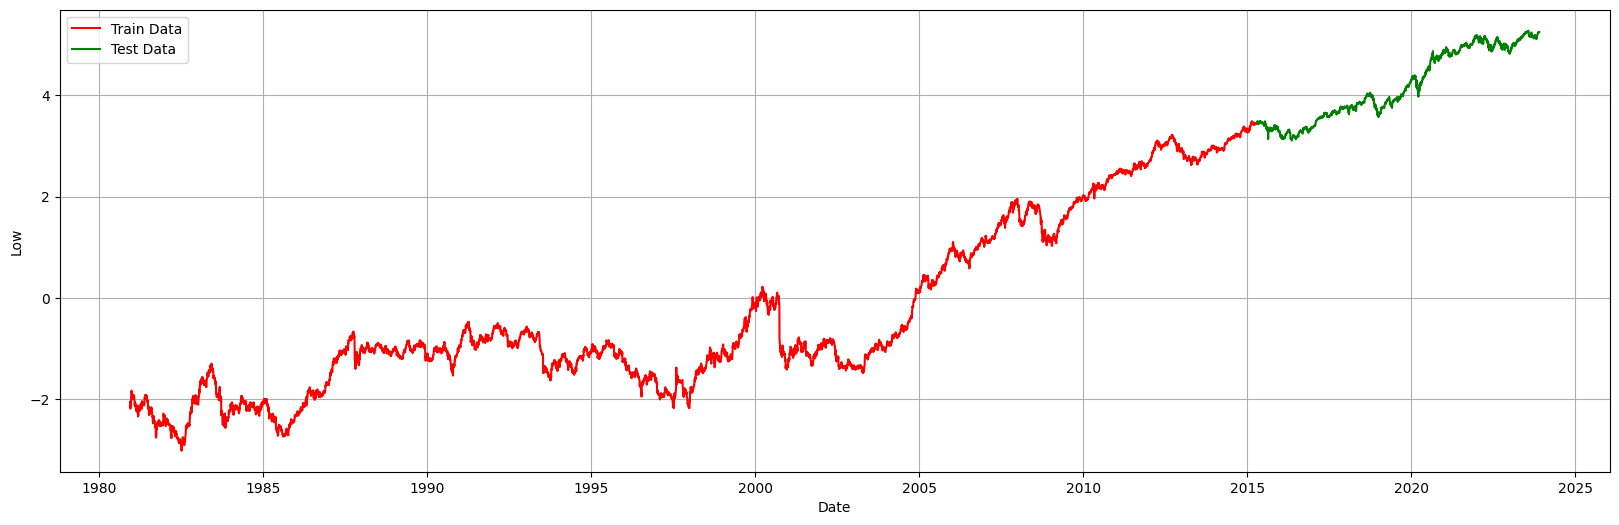

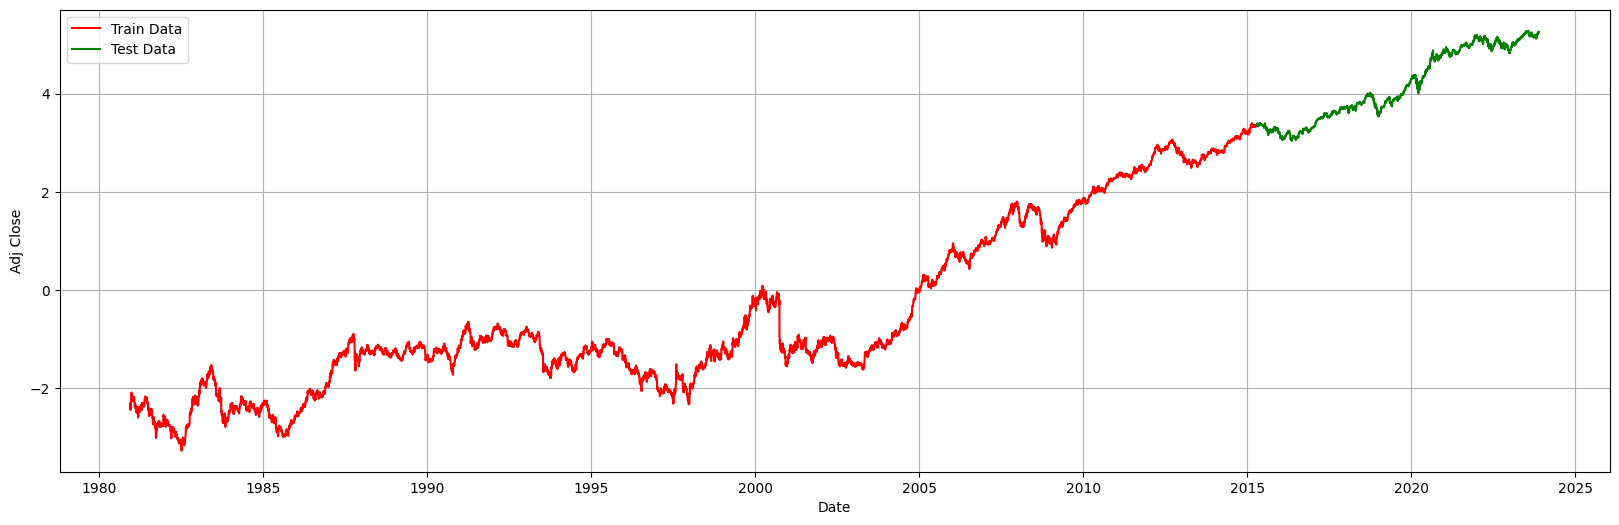

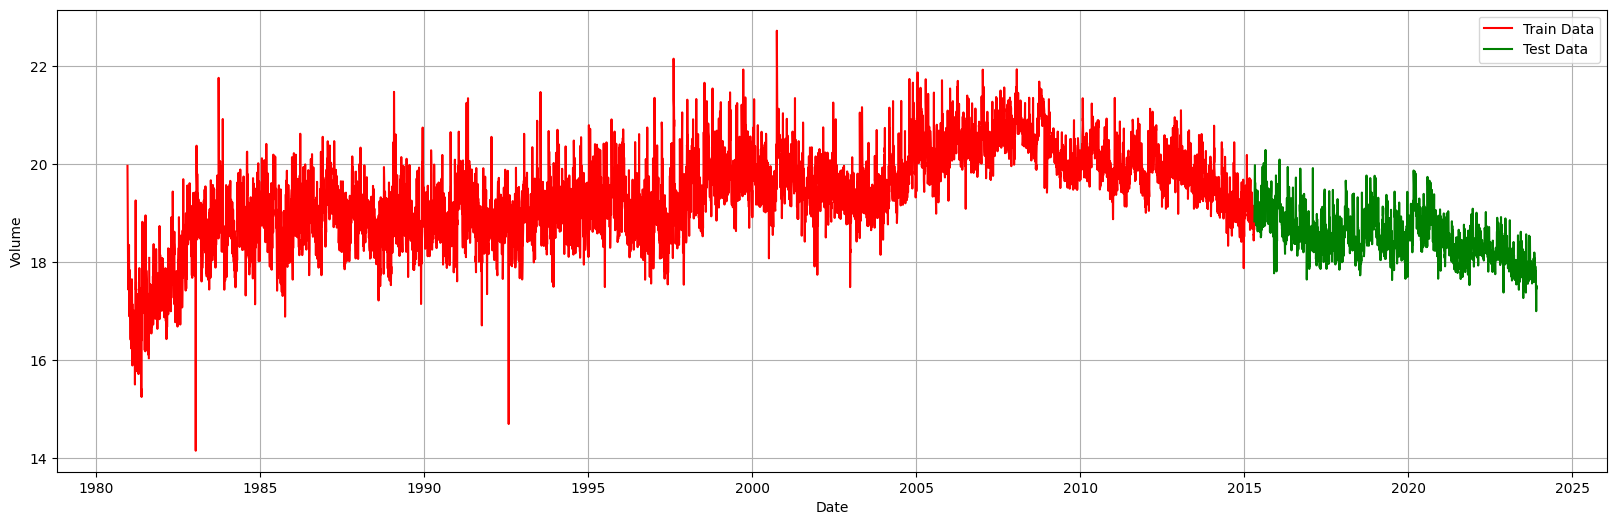

In [32]:
#splitting closing price into trainning data and testing data

def splitData(col):
    dl=np.log(data[col])
    trainData=dl[:int(len(dl)*0.8)]
    testData=dl[int(len(dl)*0.8):]
    plt.figure(figsize=(20,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.plot(trainData,'red',label='Train Data')
    plt.plot(testData,'green',label='Test Data')
    plt.legend()
    return trainData,testData

closeTrain,closeTest=splitData('Close')
openTrain,openTest=splitData('Open')
highTrain,highTest=splitData('High')
lowTrain,lowTest=splitData('Low')
adjCloseTrain,adjCloseTest=splitData('Adj Close')
volumeTrain,volumeTest=splitData('Volume')


In [34]:
trainData=closeTrain
testData=closeTest   

In [37]:
#ARIMA Modelling 
#---> Make data stationery and find p, d and q
#---> or Use AutoArima to find p,d,q 

<Axes: xlabel='Date'>

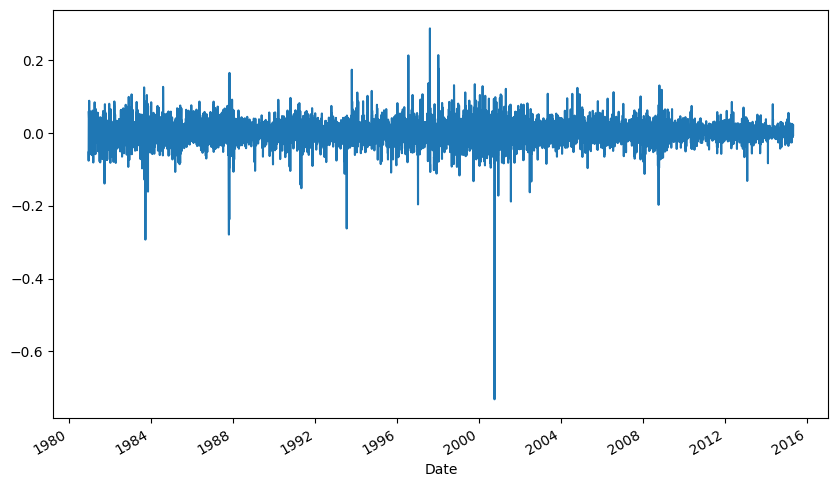

In [35]:
#Differencing time series ----> To make data stationery

trainDataDiff=trainData.diff().dropna()
trainDataDiff.plot() 

In [36]:
#Stationerity of first difference
print("First Difference Closing data: ")
adfuller_test(trainDataDiff)

#Data becomes stationery with  first difference => d=1

First Difference Closing data: 
ADF Test Statistic : -25.02376460368217
p-value : 0.0
#Laggs Used : 12
Number of Observations : 8650
Reject null hypothesis. Data is stationery.


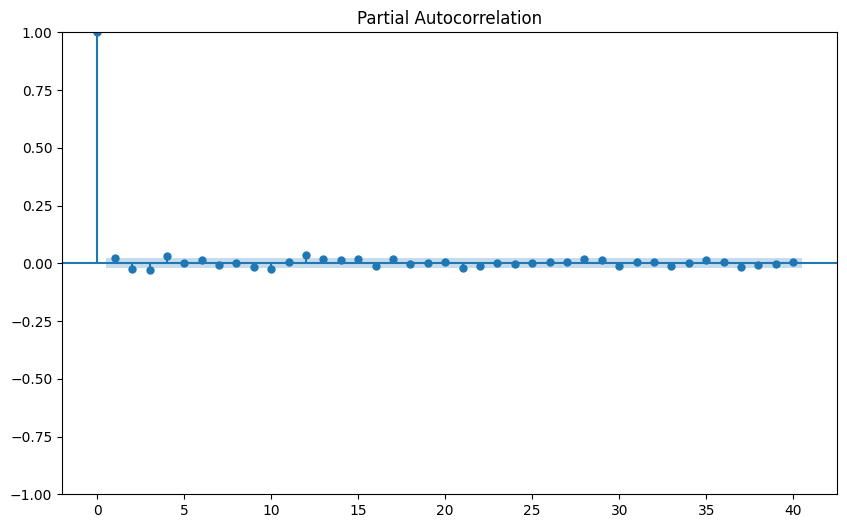

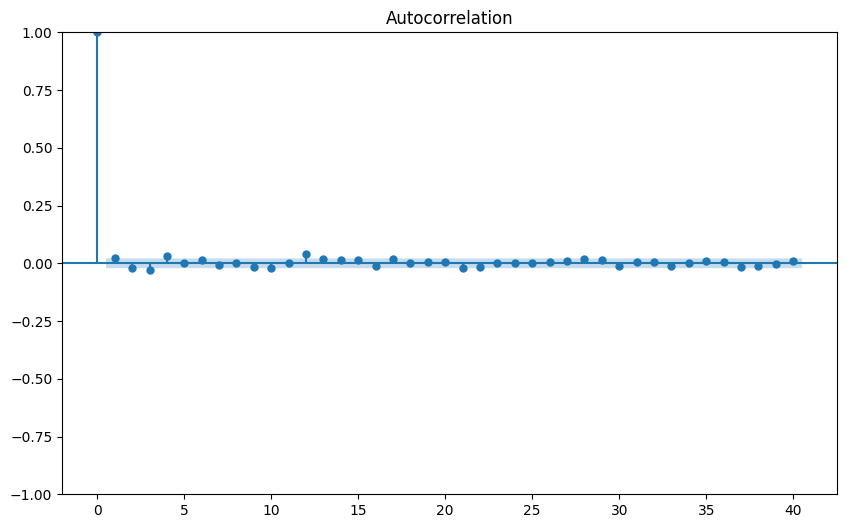

In [38]:
#Finding p and q
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(trainDataDiff)
plot_acf(trainDataDiff)
plt.show()
#p=0; d=1; q=0

First Difference: 
ADF Test Statistic : -25.017887126109702
p-value : 0.0
#Laggs Used : 12
Number of Observations : 8650
Reject null hypothesis. Data is stationery.


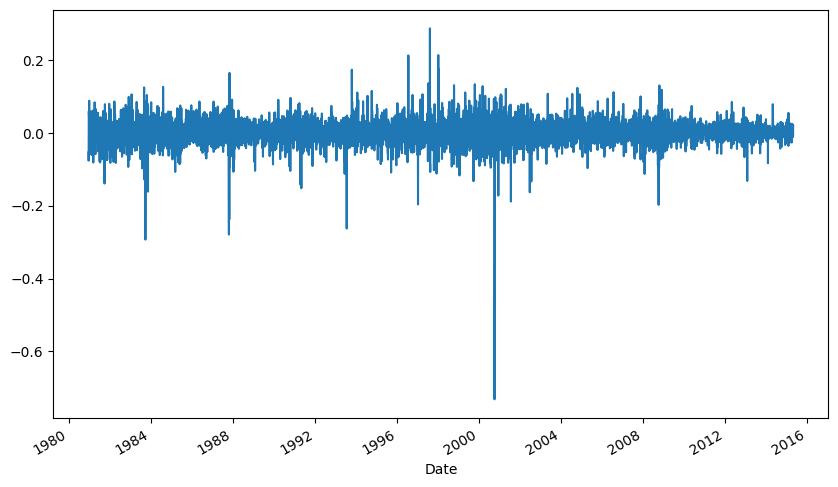

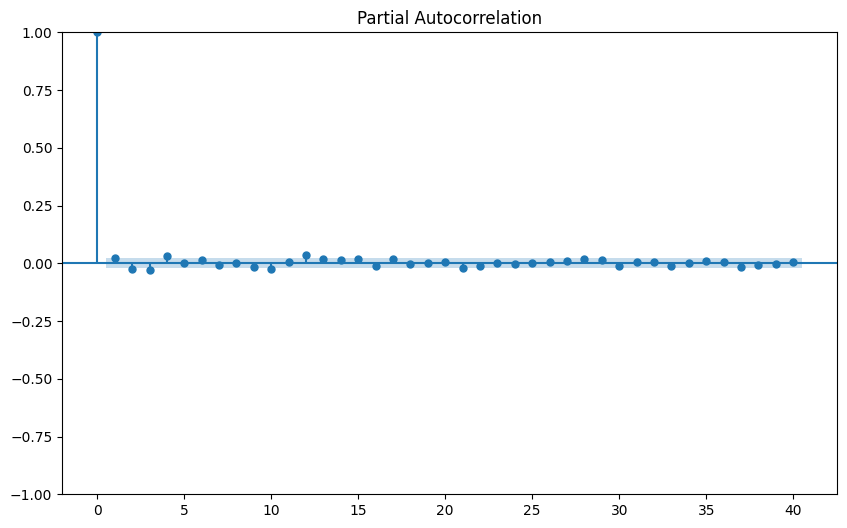

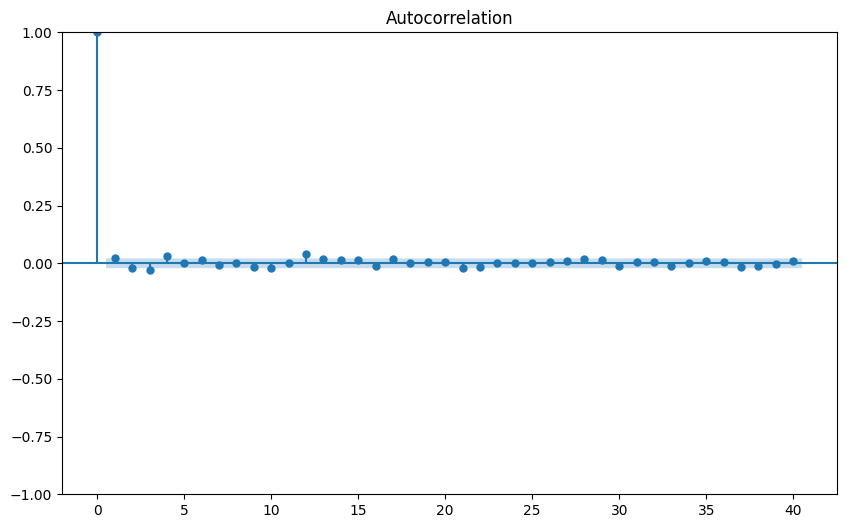

In [1216]:
def TrialArima(trainData2):
    trainDataDiff=trainData2.diff().dropna()
    trainDataDiff.plot()
    print("First Difference: ")
    adfuller_test(trainDataDiff)
    plot_pacf(trainDataDiff)
    plot_acf(trainDataDiff)
    plt.show()

TrialArima(adjCloseTrain)

In [40]:
#Arima Model 
from statsmodels.tsa.arima.model import ARIMA
resultModel=ARIMA(trainDataDiff,order=(0,1,0))
fitted=resultModel.fit()
print(fitted.summary())

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8663
Model:                 ARIMA(0, 1, 0)   Log Likelihood               15054.099
Date:                Thu, 21 Dec 2023   AIC                         -30106.198
Time:                        07:02:57   BIC                         -30099.131
Sample:                             0   HQIC                        -30103.788
                               - 8663                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0018   7.26e-06    249.385      0.000       0.002       0.002
Ljung-Box (L1) (Q):                1964.44   Jarque-Bera (JB):            257634.85
Prob(Q):                              0.00   Pr

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
#Finding best arima parameters using autoarima
import pmdarima as pm
def autoArimaModel(trdata):
    model=pm.auto_arima(trdata,trace=True,suppress_warnings=True)
    best_orders = model.get_params()['order']
    print(model.summary())
    model.plot_diagnostics(figsize=(15,8))
    plt.show()
    return best_orders

In [42]:
import pmdarima as pm

In [43]:
#Arima Model using autoarima values
def fittingModel(best_order,trainData,testData):
    #Fit the model
    resultModel=ARIMA(trainData,order=best_order)
    fitted=resultModel.fit()
    print(fitted.summary())
    #Predict values
    startdate = testData.index[0].date()
    enddate = testData.index[-1].date()
    startdate = pd.Timestamp(startdate)
    enddate = pd.Timestamp(enddate)
    pred = fitted.get_forecast(steps=len(testData), alpha=0.05).predicted_mean
    forecast_index = pd.date_range(start=startdate, periods=len(testData), freq='B')  
    pred.index = forecast_index
    print("\nPredicted Values: ")
    print(np.exp(pred))
    print("\n")

    #Plot the result
    trainData.plot(label='Train data',color='blue')
    testData.plot(label='Test data',color='green')
    pred.plot(label='Predicted data',color='red')
    plt.legend(loc='best')
    plt.plot(figsize=(12,10))
    plt.show()
    #Accuracy check
    mse=mean_squared_error(testData,pred)
    mae=mean_absolute_error(testData,pred)
    rmse=math.sqrt(mse)
    mape=np.mean(np.abs(pred-testData)/np.abs(testData))
    print("Accuracy Metrics: ")
    print("MSE: ",mse)
    print("MAE: ",mae)
    print("RMSE: ",rmse)
    print("MAPE: ",mape)
    print("Model is ",round(100-(mape*100),2),"% accurate.")

In [44]:
from statsmodels.tsa.arima.model import ARIMA



Closing Price: 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-35910.755, Time=7.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-35898.322, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-35901.455, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-35901.673, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-35896.547, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-35903.504, Time=4.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-35901.945, Time=2.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-35912.100, Time=1.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-35908.024, Time=2.55 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-35896.031, Time=3.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-35911.560, Time=4.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-35911.607, Time=3.94 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-35913.842, Time=2.91 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-35915.845, T

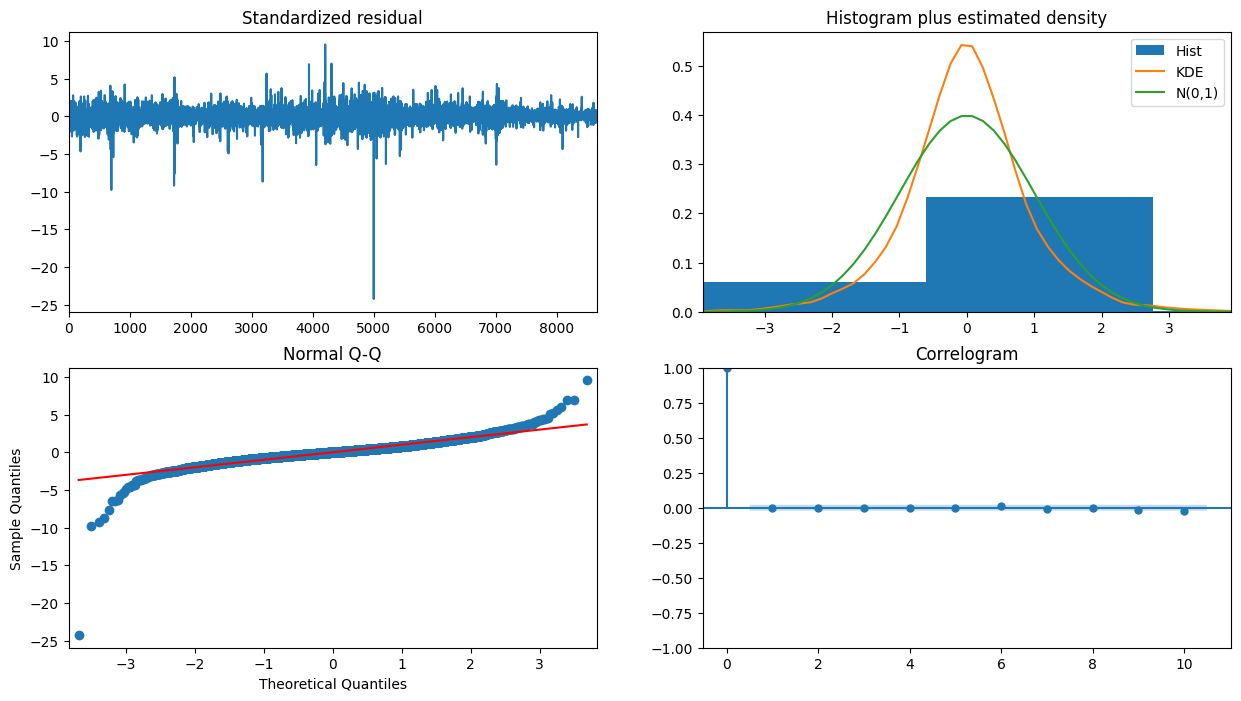


Opening Price: 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-36007.542, Time=3.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-36011.331, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-36009.474, Time=1.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-36009.472, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-36009.494, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-36007.332, Time=0.63 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 7.276 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8664
Model:               SARIMAX(0, 1, 0)   Log Likelihood               18007.666
Date:                Thu, 21 Dec 2023   AIC                         -36011.331
Time:                        07:04:21   BIC                         -35997.198
Sample:                             0   HQIC               

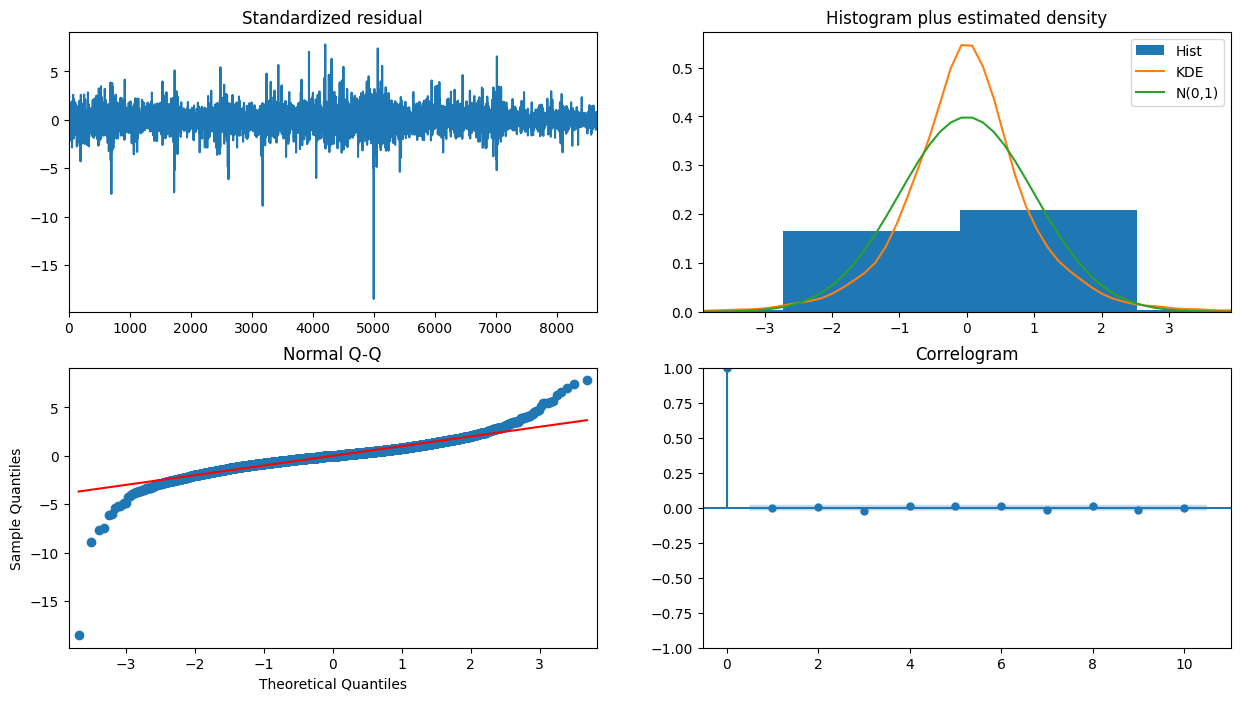


Highest Price: 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-37977.884, Time=3.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-37862.407, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-37977.276, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-37982.288, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-37859.661, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-37982.002, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-37981.960, Time=1.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-37980.617, Time=1.64 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-37980.435, Time=0.64 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 10.129 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8664
Model:               SARIMAX(0, 1, 1)   Log Likelihood               18994.144
Date:       

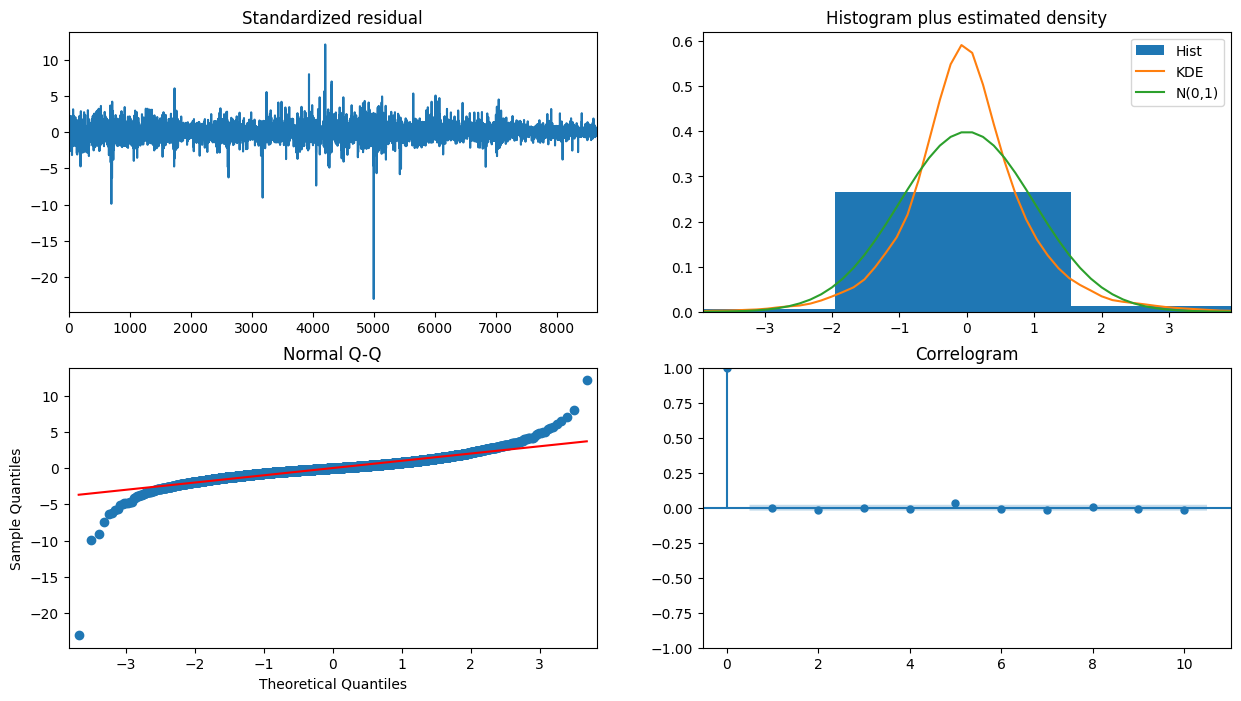


Least Price: 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-36717.320, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-36630.880, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-36701.717, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-36707.484, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-36628.775, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-36714.174, Time=1.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-36714.709, Time=0.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-36721.007, Time=1.91 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-36715.542, Time=0.79 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-36712.625, Time=9.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-36713.648, Time=8.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-36716.130, Time=3.56 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-36713.887, Time=2.30 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-36709.605, Tim

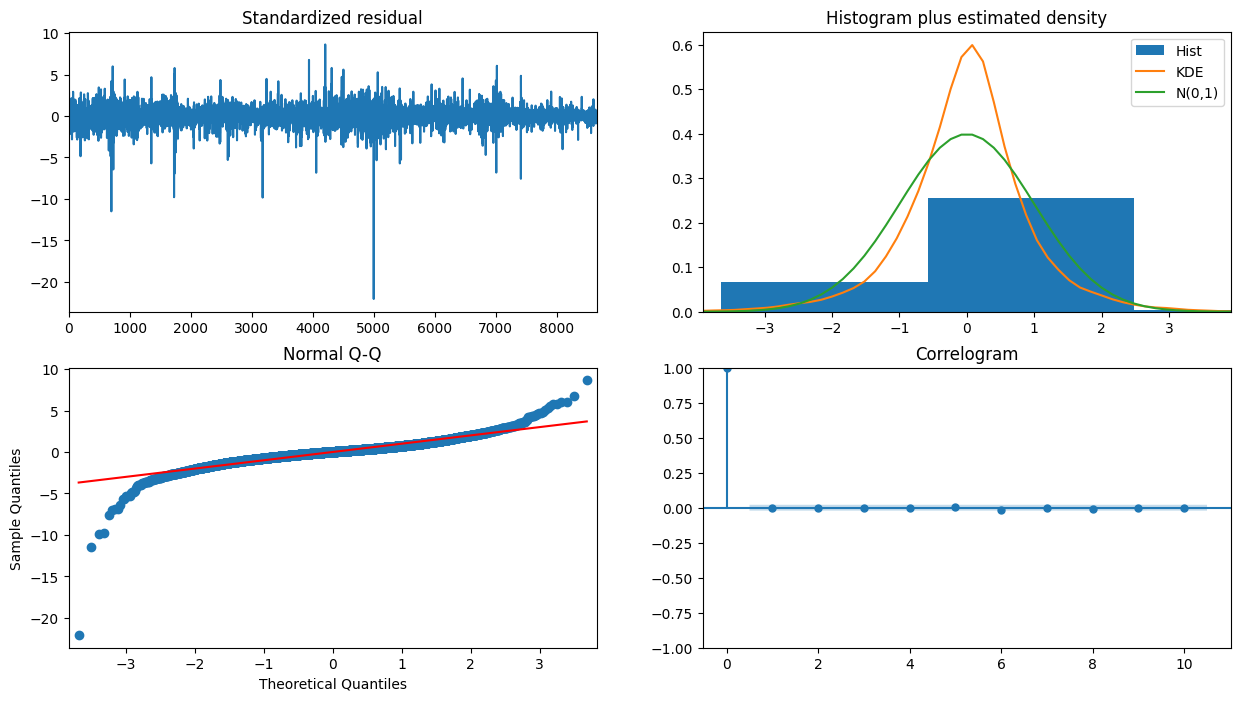


Adjacent Closing Price: 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-35910.577, Time=8.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-35899.451, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-35902.528, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-35902.742, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-35897.468, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-35901.308, Time=1.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-35902.975, Time=3.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-35913.184, Time=1.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-35909.095, Time=1.93 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-35897.049, Time=7.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-35912.667, Time=6.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-35912.677, Time=2.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-35914.943, Time=2.44 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-359

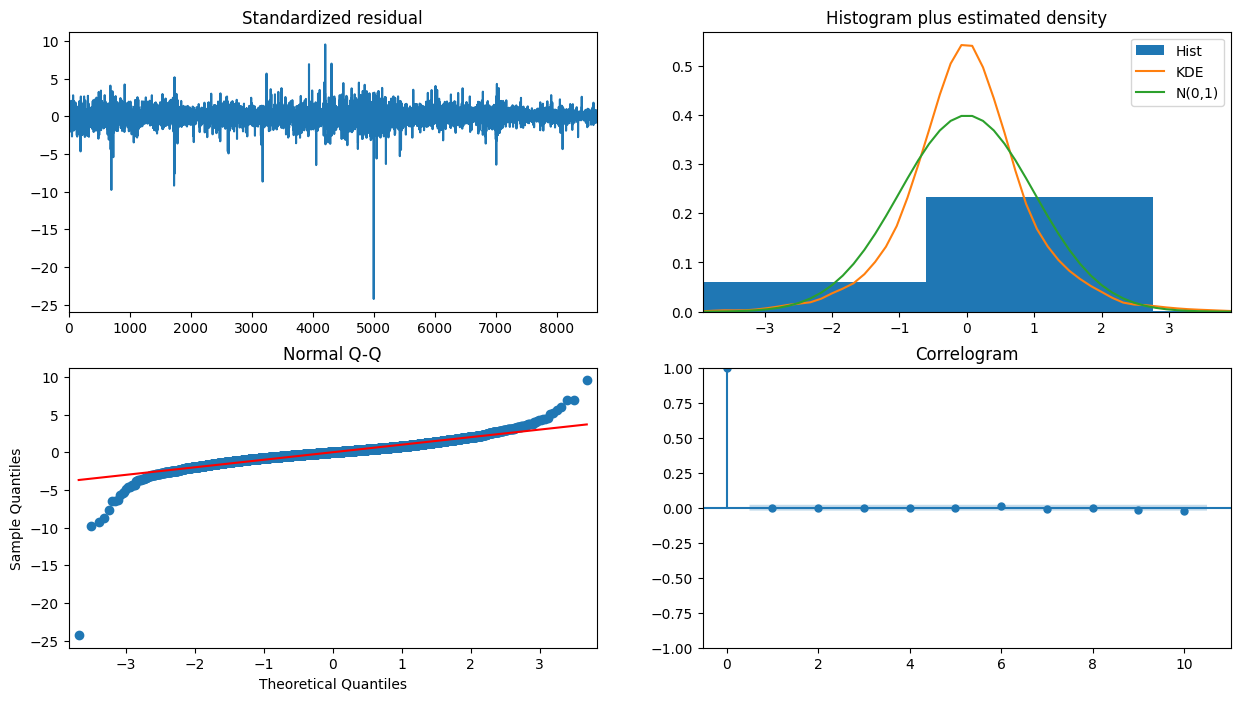

In [45]:
#Modelling Closing Price
print("\nClosing Price: \n")
closeOrder=autoArimaModel(closeTrain)
print("\nOpening Price: \n")
openOrder=autoArimaModel(openTrain)
print("\nHighest Price: \n")
highOrder=autoArimaModel(highTrain)
print("\nLeast Price: \n")
lowOrder=autoArimaModel(lowTrain)
print("\nAdjacent Closing Price: \n")
adjOrder=autoArimaModel(adjCloseTrain)

In [46]:
print(closeOrder)

(4, 1, 0)



Closing Price: 



c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8664
Model:                 ARIMA(4, 1, 0)   Log Likelihood               17962.043
Date:                Thu, 21 Dec 2023   AIC                         -35914.087
Time:                        07:07:26   BIC                         -35878.752
Sample:                             0   HQIC                        -35902.040
                               - 8664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0252      0.008      3.233      0.001       0.010       0.041
ar.L2         -0.0209      0.007     -3.011      0.003      -0.034      -0.007
ar.L3         -0.0300      0.008     -3.850      0.0

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


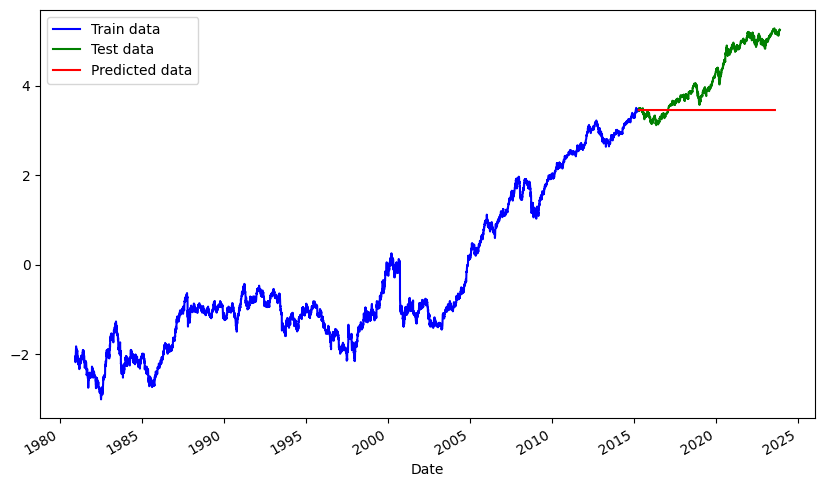

Accuracy Metrics: 
MSE:  1.0466987162987518
MAE:  0.8087541493311503
RMSE:  1.0230829469298919
MAPE:  0.16744215399790605
Model is  83.26 % accurate.

Closing Price: 



c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 8664
Model:                 ARIMA(0, 1, 0)   Log Likelihood               18005.747
Date:                Thu, 21 Dec 2023   AIC                         -36009.494
Time:                        07:07:27   BIC                         -36002.427
Sample:                             0   HQIC                        -36007.085
                               - 8664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   4.34e-06    211.042      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):            125874.49
Prob(Q):                              0.71   Pr

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


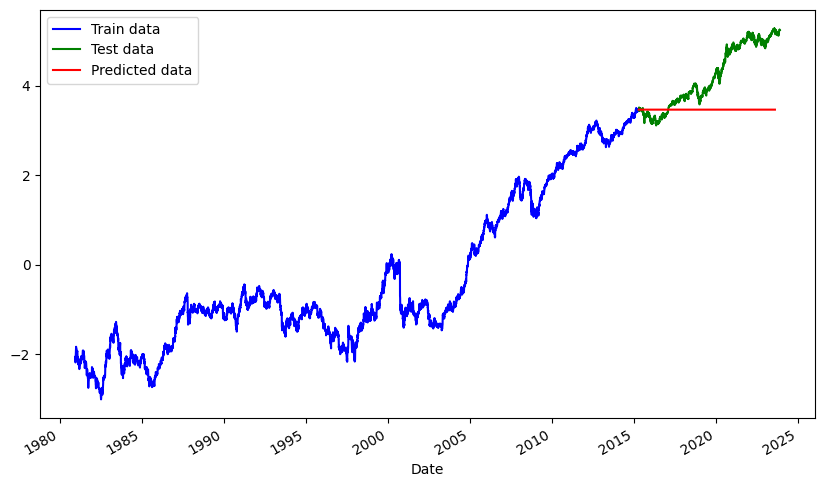

Accuracy Metrics: 
MSE:  1.0303843905199064
MAE:  0.8019729426531135
RMSE:  1.0150785144607812
MAPE:  0.1660889983626323
Model is  83.39 % accurate.

Highest Price: 



c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 8664
Model:                 ARIMA(0, 1, 1)   Log Likelihood               18992.218
Date:                Thu, 21 Dec 2023   AIC                         -37980.435
Time:                        07:07:29   BIC                         -37966.301
Sample:                             0   HQIC                        -37975.617
                               - 8664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1192      0.009     13.683      0.000       0.102       0.136
sigma2         0.0007   2.45e-06    297.672      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


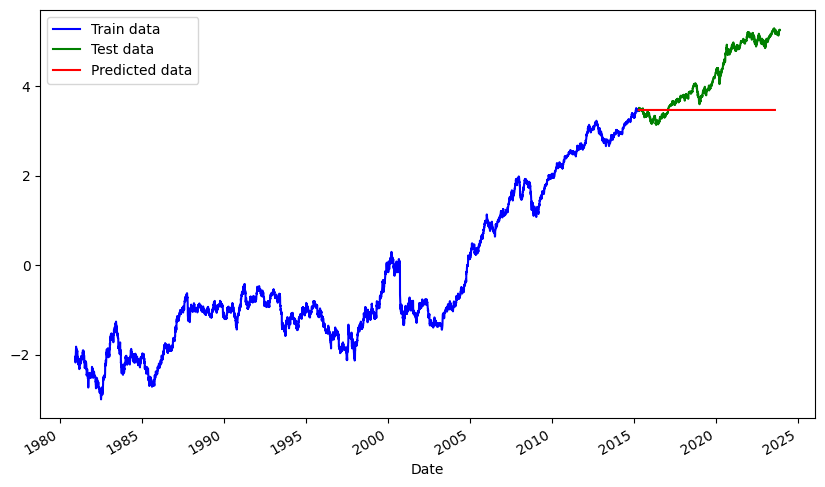

Accuracy Metrics: 
MSE:  1.0466349383668372
MAE:  0.808512608261448
RMSE:  1.0230517769726208
MAPE:  0.16701537176117293
Model is  83.3 % accurate.

Least Price: 



c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 8664
Model:                 ARIMA(3, 1, 2)   Log Likelihood               18366.076
Date:                Thu, 21 Dec 2023   AIC                         -36720.152
Time:                        07:07:30   BIC                         -36677.751
Sample:                             0   HQIC                        -36705.696
                               - 8664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1617      0.112     10.351      0.000       0.942       1.382
ar.L2         -0.7866      0.084     -9.419      0.000      -0.950      -0.623
ar.L3          0.0911      0.011      8.035      0.0

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


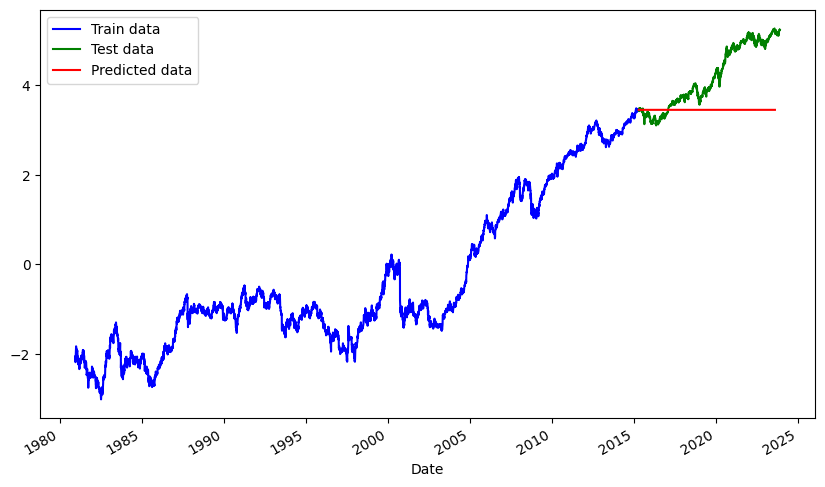

Accuracy Metrics: 
MSE:  1.0303715965263696
MAE:  0.8021861755465489
RMSE:  1.015072212468832
MAPE:  0.16651677006143034
Model is  83.35 % accurate.

Adjacent Closing Price: 



c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 8664
Model:                 ARIMA(4, 1, 0)   Log Likelihood               17962.490
Date:                Thu, 21 Dec 2023   AIC                         -35914.981
Time:                        07:07:32   BIC                         -35879.647
Sample:                             0   HQIC                        -35902.935
                               - 8664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0251      0.008      3.220      0.001       0.010       0.040
ar.L2         -0.0207      0.007     -2.992      0.003      -0.034      -0.007
ar.L3         -0.0301      0.008     -3.857      0.0

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


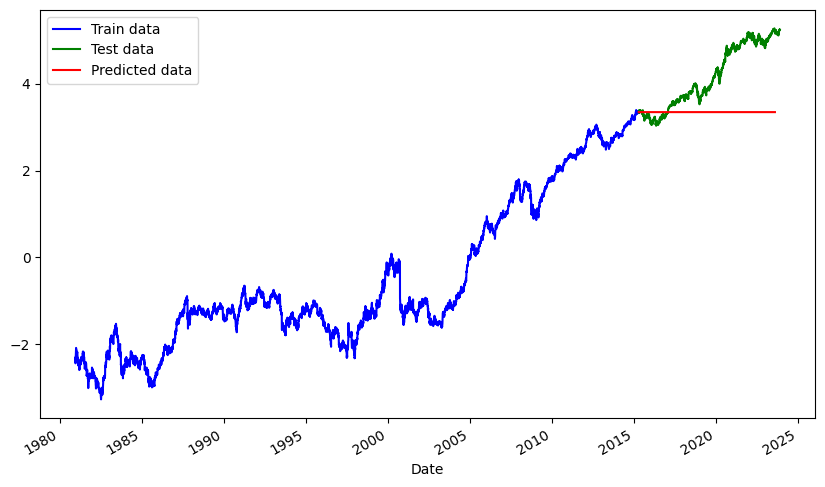

Accuracy Metrics: 
MSE:  1.1930970958203997
MAE:  0.8683199856926956
RMSE:  1.0922898405736454
MAPE:  0.18107032530106668
Model is  81.89 % accurate.


In [49]:
#Fitting the Closing Price
print("\nClosing Price: \n")
fittingModel(closeOrder,closeTrain,closeTest)
print("\nClosing Price: \n")
fittingModel(openOrder,openTrain,openTest)
print("\nHighest Price: \n")
fittingModel(highOrder,highTrain,highTest)
print("\nLeast Price: \n")
fittingModel(lowOrder,lowTrain,lowTest)
print("\nAdjacent Closing Price: \n")
fittingModel(adjOrder,adjCloseTrain,adjCloseTest)


In [50]:
#For saving model
model=pm.auto_arima(trainData,trace=True,suppress_warnings=True)
best_order = model.get_params()['order']
resultModel=ARIMA(trainData,order=best_order)
fitted=resultModel.fit()
startdate = testData.index[0].date()
enddate = testData.index[-1].date()
startdate = pd.Timestamp(startdate)
enddate = pd.Timestamp(enddate)
pred = fitted.get_forecast(steps=len(testData), alpha=0.05).predicted_mean
forecast_index = pd.date_range(start=startdate, periods=len(testData), freq='B')  
pred.index = forecast_index

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-35910.755, Time=7.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-35898.322, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-35901.455, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-35901.673, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-35896.547, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-35903.504, Time=6.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-35901.945, Time=4.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-35912.100, Time=2.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-35908.024, Time=4.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-35896.031, Time=7.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-35911.560, Time=9.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-35911.607, Time=7.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-35913.842, Time=5.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-35915.845, Time=4.96 sec
 ARIM

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

In [51]:
fitted

In [52]:
import pickle

with open('model_pkl','wb') as files:
    pickle.dump(fitted,files)

In [53]:
#Trial
with open('model_pkl','rb') as f:
    loaded_model=pickle.load(f)
    

In [54]:
target_date = pd.Timestamp('2023-12-20') 
future_index = pd.date_range(start=loaded_model.fittedvalues.index[-1] + pd.DateOffset(1), end=target_date, freq='B')
forecast_steps = len(future_index)
forecast = loaded_model.get_forecast(steps=forecast_steps, alpha=0.05)
pred_mean = forecast.predicted_mean
pred_mean.index = future_index
nearest_index = (pred_mean.index - target_date).argmin()
predicted_value = pred_mean.iloc[nearest_index]
print(np.exp(predicted_value))

31.71427209735717


c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
#Model Accuracy
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
import math

mse=mean_squared_error(testData,pred)
mae=mean_absolute_error(testData,pred)
rmse=math.sqrt(mse)
mape=np.mean(np.abs(pred-testData)/np.abs(testData))
print("Accuracy Metrics: ")
print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)
print("MAPE: ",mape)
print("Model is ",round(100-(mape*100),2),"% accurate.")

Accuracy Metrics: 
MSE:  1.0466987162987518
MAE:  0.8087541493311503
RMSE:  1.0230829469298919
MAPE:  0.16744215399790605
Model is  83.26 % accurate.


c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8664
Model:                 ARIMA(4, 1, 0)   Log Likelihood               17962.043
Date:                Thu, 21 Dec 2023   AIC                         -35914.087
Time:                        07:10:35   BIC                         -35878.752
Sample:                             0   HQIC                        -35902.040
                               - 8664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0252      0.008      3.233      0.001       0.010       0.041
ar.L2         -0.0209      0.007     -3.011      0.003      -0.034      -0.007
ar.L3         -0.0300      0.008     -3.850      0.0

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


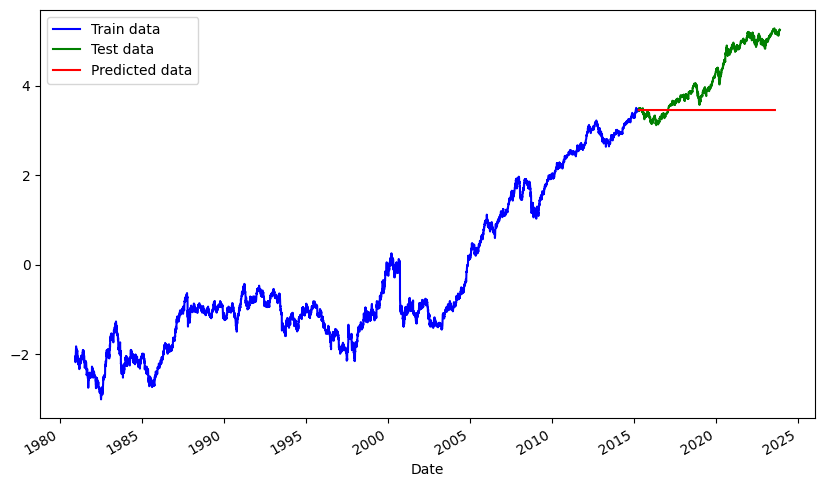

Accuracy Metrics: 
MSE:  1.0466987162987518
MAE:  0.8087541493311503
RMSE:  1.0230829469298919
MAPE:  0.16744215399790605
Model is  83.26 % accurate.


In [56]:
model=fittingModel(closeOrder,closeTrain,closeTest)

In [57]:
##LSTM

In [58]:
#dataset matrix

def create_dataset(dataset,timestep=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep)]
        dataX.append(a)
        dataY.append(dataset[i+timestep])
    return np.array(dataX),np.array(dataY)

In [59]:
trainData=closeTrain
testData=closeTest   

In [60]:
X_train,Y_train=create_dataset(trainData)
X_test,Y_test=create_dataset(testData)         
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

136/136 [==============================] - 13s 23ms/step - loss: 1.1472 - val_loss: 1.8442
Epoch 2/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0183 - val_loss: 0.7197
Epoch 3/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0051 - val_loss: 0.2988
Epoch 4/100
136/136 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 0.1590
Epoch 5/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0011 - val_loss: 0.1306
Epoch 6/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.1160
Epoch 7/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.1184
Epoch 8/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.1155
Epoch 9/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.1115
Epoch 10/100
136/136 [==============================] - 1s 8ms/step - loss: 0.0010 - val

In [65]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

68/68 [==============================] - 0s 4ms/step


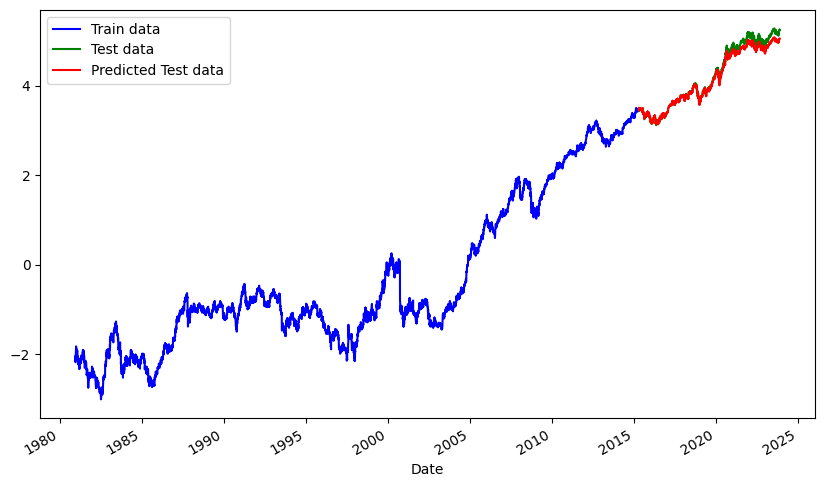

Accuracy Metrics: 
MSE:  0.008699952854967248
MAE:  0.06655428185044791
RMSE:  0.09327353780664294
MAPE:  0.1835639166651206
Model is  81.64 % accurate.


In [66]:
train_predict_series = pd.Series(train_predict.flatten(), index=trainData.index[:len(train_predict)])
test_predict_series = pd.Series(test_predict.flatten(), index=testData.index[:len(test_predict)])
#Plot the result
trainData.plot(label='Train data',color='blue')
testData.plot(label='Test data',color='green')
#train_predict_series.plot(label='Predicted Train data',color='red')
test_predict_series.plot(label='Predicted Test data',color='red')
plt.legend(loc='best')
plt.plot(figsize=(20,10))
plt.show()
#Accuracy check
mse=mean_squared_error(Y_test,test_predict)
mae=mean_absolute_error(Y_test,test_predict)
rmse=math.sqrt(mse)
mape=np.mean(np.abs(test_predict-Y_test)/np.abs(Y_test))
print("Accuracy Metrics: ")
print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)
print("MAPE: ",mape)
print("Model is ",round(100-(mape*100),2),"% accurate.")

In [67]:
with open('model_pkl2','wb') as files:
    pickle.dump(model,files)

In [68]:
with open('model_pkl2','rb') as f:
    loaded_model2=pickle.load(f)
    

In [69]:
future_date = pd.to_datetime('2023-12-31')
last_timestep = trainData[-X_train.shape[1]:].values.reshape(1, -1, 1)
prediction = np.exp(loaded_model2.predict(last_timestep))

print(f"Prediction for {future_date}: {prediction[0][0]}")

1/1 [==============================] - 2s 2s/step
Prediction for 2023-12-31 00:00:00: 31.885902404785156


In [63]:
pip install tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install tensorflow --index-url=https://pypi.python.org/simple/


  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.python.org/simple/
  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached grpcio-1.60.0-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached protobuf-4.25.1-cp310-abi3-win_amd64.whl (413 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [147]:
pip install statsmodels

You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [47]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1276]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1277]:
pip install virtualenv

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\sayan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
